In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
filterwarnings('ignore')
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Set màu và kích thước

In [ ]:
# Setting Visualization
plt.rcParams['figure.figsize'] = [15,8]

# Creating custom color
colors = ['#97C1A9','#DCDCDC','#AFC197','#9AC197','#97C1BE','#97C1A2','#C1979A',
          '#A997C1','#77AE8F','#DCDCDC','#67A481','#C197AF']

giới hạn tối đa bao nhiêu cột

In [ ]:
pd.set_option("display.max_columns", 25)

In [ ]:
df = pd.read_excel("bean.csv")

df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Kiểm tra hình dạng và kích thước của tập dữ liệu

In [ ]:
df.shape

(13611, 17)

In [ ]:
df.size

231387

Kiểm tra kiểu dữ liệu, số giá trị none và tên của từng biến trong tập dữ liệu

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

# check vòng lặp

In [ ]:
# check for duplicated values
df.duplicated().sum()

68

In [ ]:
df.drop_duplicates(inplace = True) # xóa vòng lặp
df.duplicated().sum()

0

# Kiểm tra các giá trị còn thiếu. Hiển thị số giá trị bị thiếu trên mỗi cột

In [ ]:
missing_values = pd.DataFrame({"Number of missing value": df.isnull().sum(), "Percentage of missing values": df.isnull().sum()/len(df)})

missing_values

,Number of missing value,Percentage of missing values
Area,0,0.0
Perimeter,0,0.0
MajorAxisLength,0,0.0
MinorAxisLength,0,0.0
AspectRation,0,0.0
Eccentricity,0,0.0
ConvexArea,0,0.0
EquivDiameter,0,0.0
Extent,0,0.0
Solidity,0,0.0


Kiểm tra thống kê mô tả của tập dữ liệu

In [ ]:
df.describe(include = 'object').T

,count,unique,top,freq
Class,13543,7,DERMASON,3546


có 7 class và đứng nhất là Dermason với số liệu là 3546

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000,13543.000000
mean,53048.460385,854.993406,319.895602,202.365321,1.581075,0.750315,53767.986709,253.034094,0.749829,0.987152,0.873671,0.800352,0.006561,0.001719,0.644341,0.995078
std,29392.438324,214.722684,85.809260,45.051632,0.245245,0.091858,29844.248525,59.307709,0.048939,0.004650,0.059393,0.061464,0.001130,0.000595,0.098653,0.004347
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36282.500000,703.230000,253.086806,175.886357,1.430662,0.715144,36673.000000,214.933277,0.718735,0.985678,0.833410,0.763228,0.005893,0.001158,0.582517,0.993720
50%,44580.000000,793.896000,296.404589,192.491117,1.549860,0.763997,45122.000000,238.245711,0.759903,0.988288,0.883490,0.801514,0.006643,0.001700,0.642424,0.996393
75%,61382.000000,977.146500,376.312489,217.245403,1.703916,0.809671,62360.000000,279.560351,0.786849,0.990019,0.917031,0.834470,0.007270,0.002173,0.696341,0.997891
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966908,0.932623,0.952041,0.243698,0.268580,0.999940,0.984998,0.054648,-0.197333,-0.359068,-0.269797,-0.848390,-0.641208,-0.273754,-0.358019
Perimeter,0.966908,1.000000,0.977561,0.914336,0.386097,0.391062,0.967871,0.991453,-0.020620,-0.304662,-0.548336,-0.407426,-0.865756,-0.768590,-0.408888,-0.431215
MajorAxisLength,0.932623,0.977561,1.000000,0.828360,0.550075,0.541011,0.933392,0.962271,-0.077287,-0.284857,-0.595710,-0.567902,-0.775840,-0.859401,-0.567607,-0.484464
MinorAxisLength,0.952041,0.914336,0.828360,1.000000,-0.005354,0.022391,0.951780,0.949214,0.145906,-0.156819,-0.214090,-0.018618,-0.947194,-0.475326,-0.022744,-0.266402
AspectRation,0.243698,0.386097,0.550075,-0.005354,1.000000,0.924185,0.245267,0.305237,-0.371234,-0.269110,-0.764975,-0.987644,0.020875,-0.837338,-0.978528,-0.451598
Eccentricity,0.268580,0.391062,0.541011,0.022391,0.924185,1.000000,0.270350,0.319360,-0.319678,-0.298282,-0.720138,-0.970308,0.017266,-0.859246,-0.981058,-0.450611
ConvexArea,0.999940,0.967871,0.933392,0.951780,0.245267,0.270350,1.000000,0.985255,0.052864,-0.206901,-0.363620,-0.271651,-0.848382,-0.642773,-0.275631,-0.364302
EquivDiameter,0.984998,0.991453,0.962271,0.949214,0.305237,0.319360,0.985255,1.000000,0.028762,-0.232344,-0.437189,-0.328980,-0.893403,-0.714693,-0.331594,-0.394693
Extent,0.054648,-0.020620,-0.077287,0.145906,-0.371234,-0.319678,0.052864,0.028762,1.000000,0.192268,0.344510,0.354912,-0.141525,0.237584,0.348226,0.148622
Solidity,-0.197333,-0.304662,-0.284857,-0.156819,-0.269110,-0.298282,-0.206901,-0.232344,0.192268,1.000000,0.609668,0.304802,0.154346,0.344337,0.308614,0.700150


In [ ]:
# check uniques values
df.nunique()

Area               12011
Perimeter          13416
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [ ]:
print('Class: ', df.Class.unique())

Class:  ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


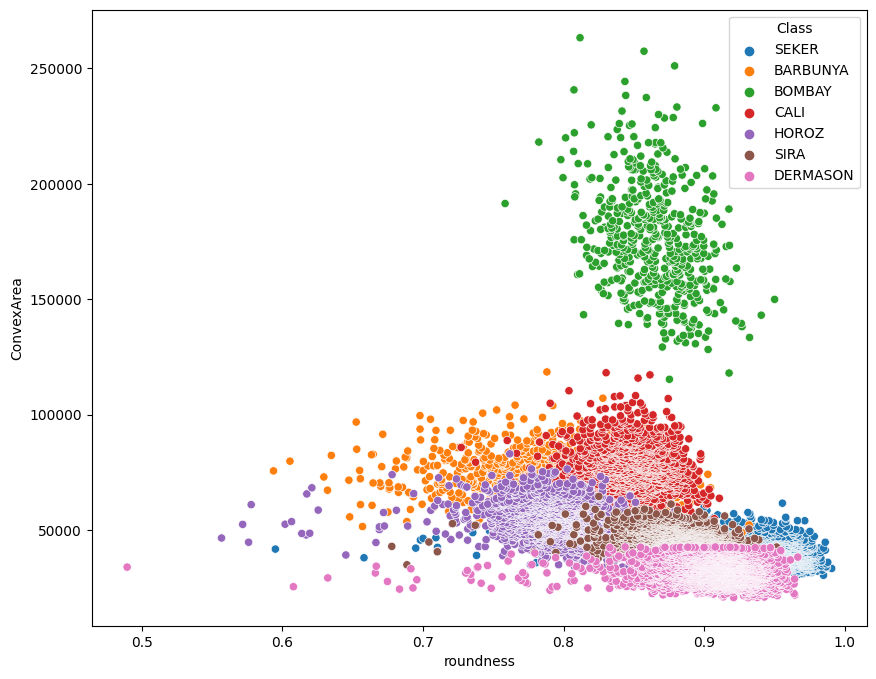

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.roundness , y=df['ConvexArea'], hue=df.Class )
plt.show()

## Phân tích đơn biến

In [ ]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

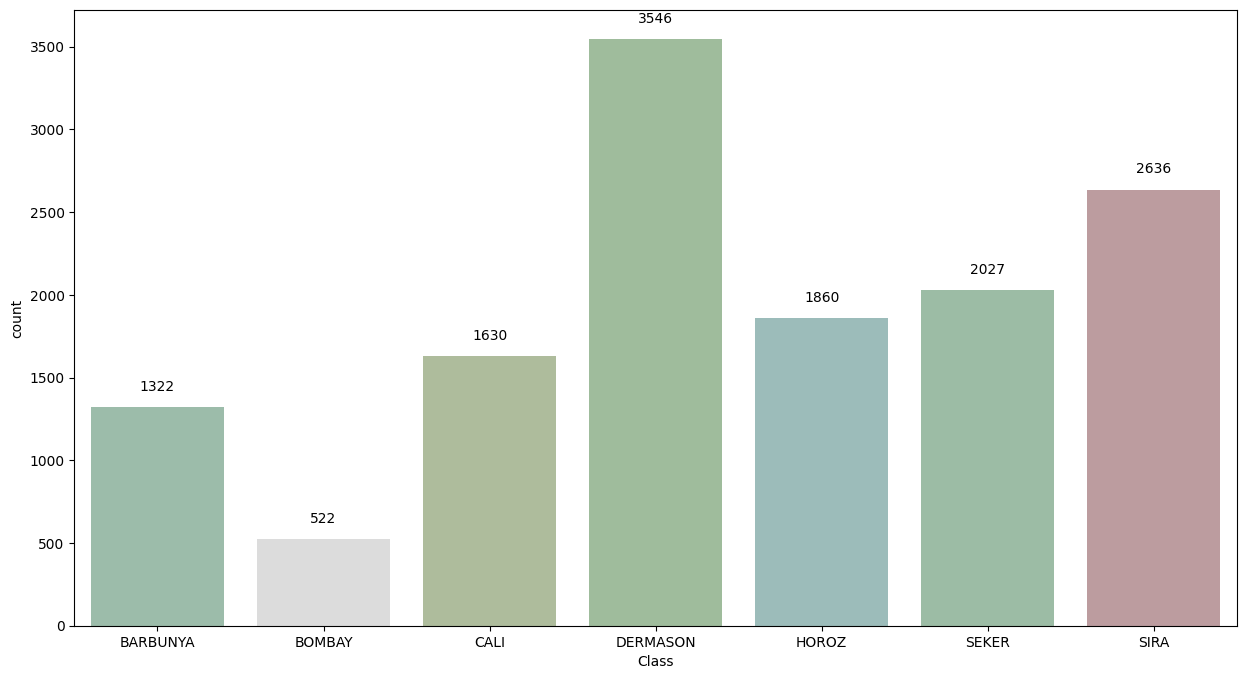

In [ ]:
sns.countplot(x=df['Class'].sort_values() , palette = colors )

for i,v in enumerate(df['Class'].value_counts().sort_index()):
    plt.text(x = i , y = v + 100, s = v , ha = 'center')

- qua biểu đồ này có tổng cộng 7 class, trong đó có Barbunya, cali, horoz, seker, sira đều có giá trị gần bằng nhau, còn dermason thì có số lượng quá nhiều trong khi Bombay có số lượng ít nhất

<Axes: xlabel='Class', ylabel='Area'>

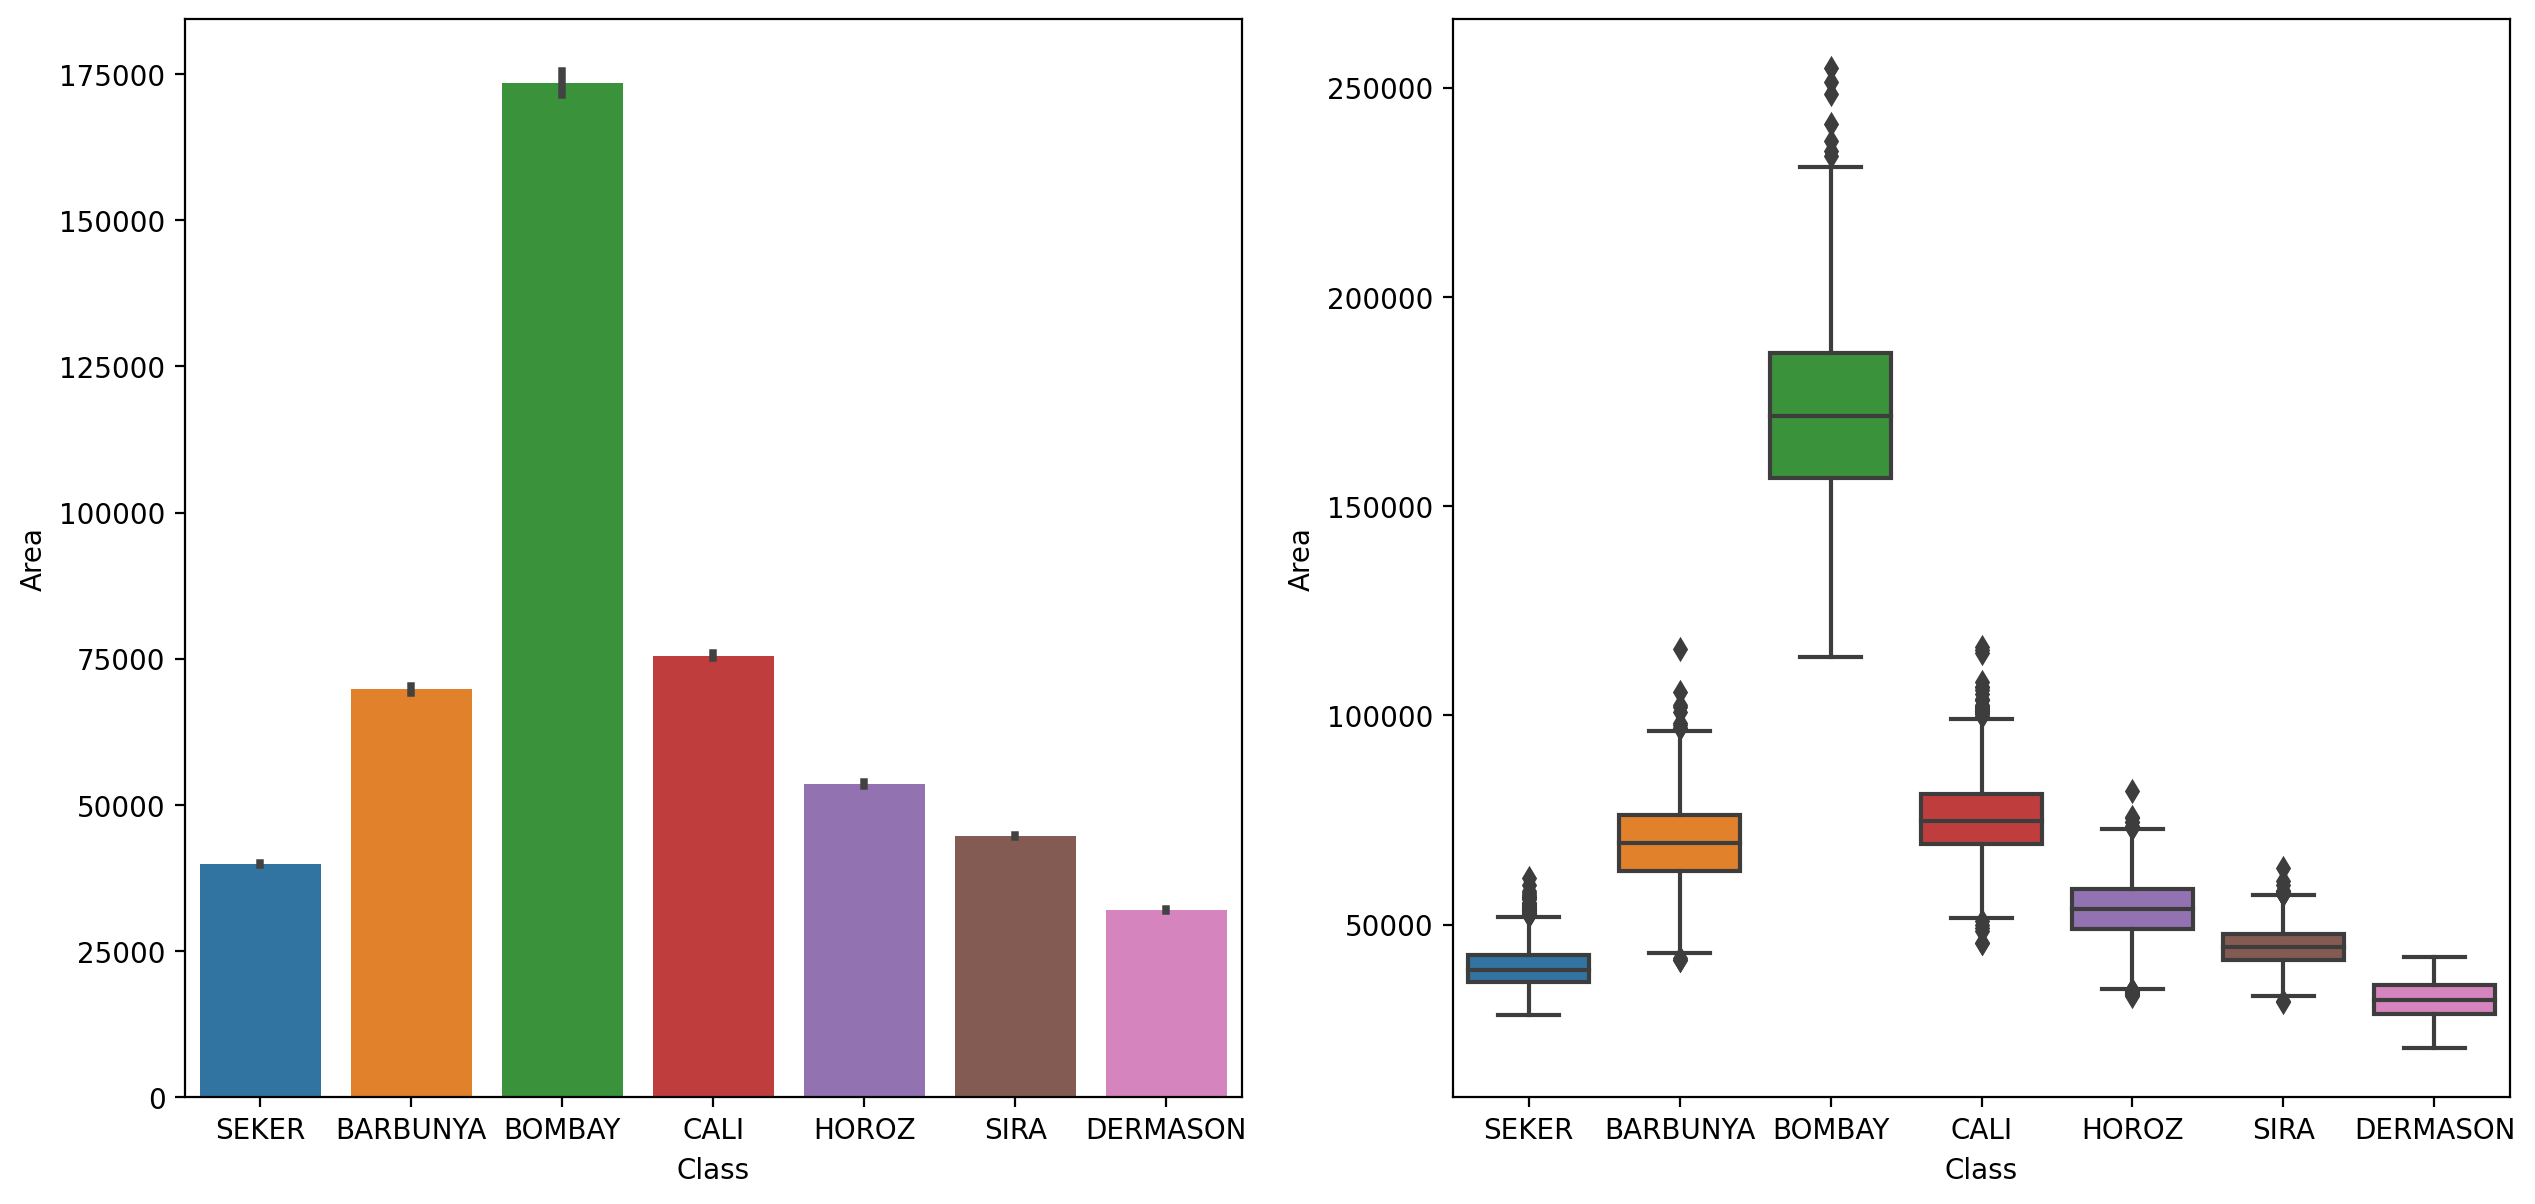

In [ ]:
plt.figure(figsize = (15,7), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x = df.Class, y = df.Area)
plt.subplot(1,2,2)
sns.boxplot(x = df.Class, y = df.Area)

- Biểu đồ này cho ta so sánh 2 bên thì cho ta thấy area của Bombay nằm trong khoảng từ 0 - 175000 trong khi ở biểu đồ bên phải nằm trong khoảng 160000 đến 18000 là diện tích chủ yếu tập trung, những vị trí nằm rìa ở trong khoảng 230000 - 260000
- Của Dermason thấp nhất nhưng không có hạt đậu nằm vùng ngoại lệ nào

<Axes: xlabel='Class', ylabel='Perimeter'>

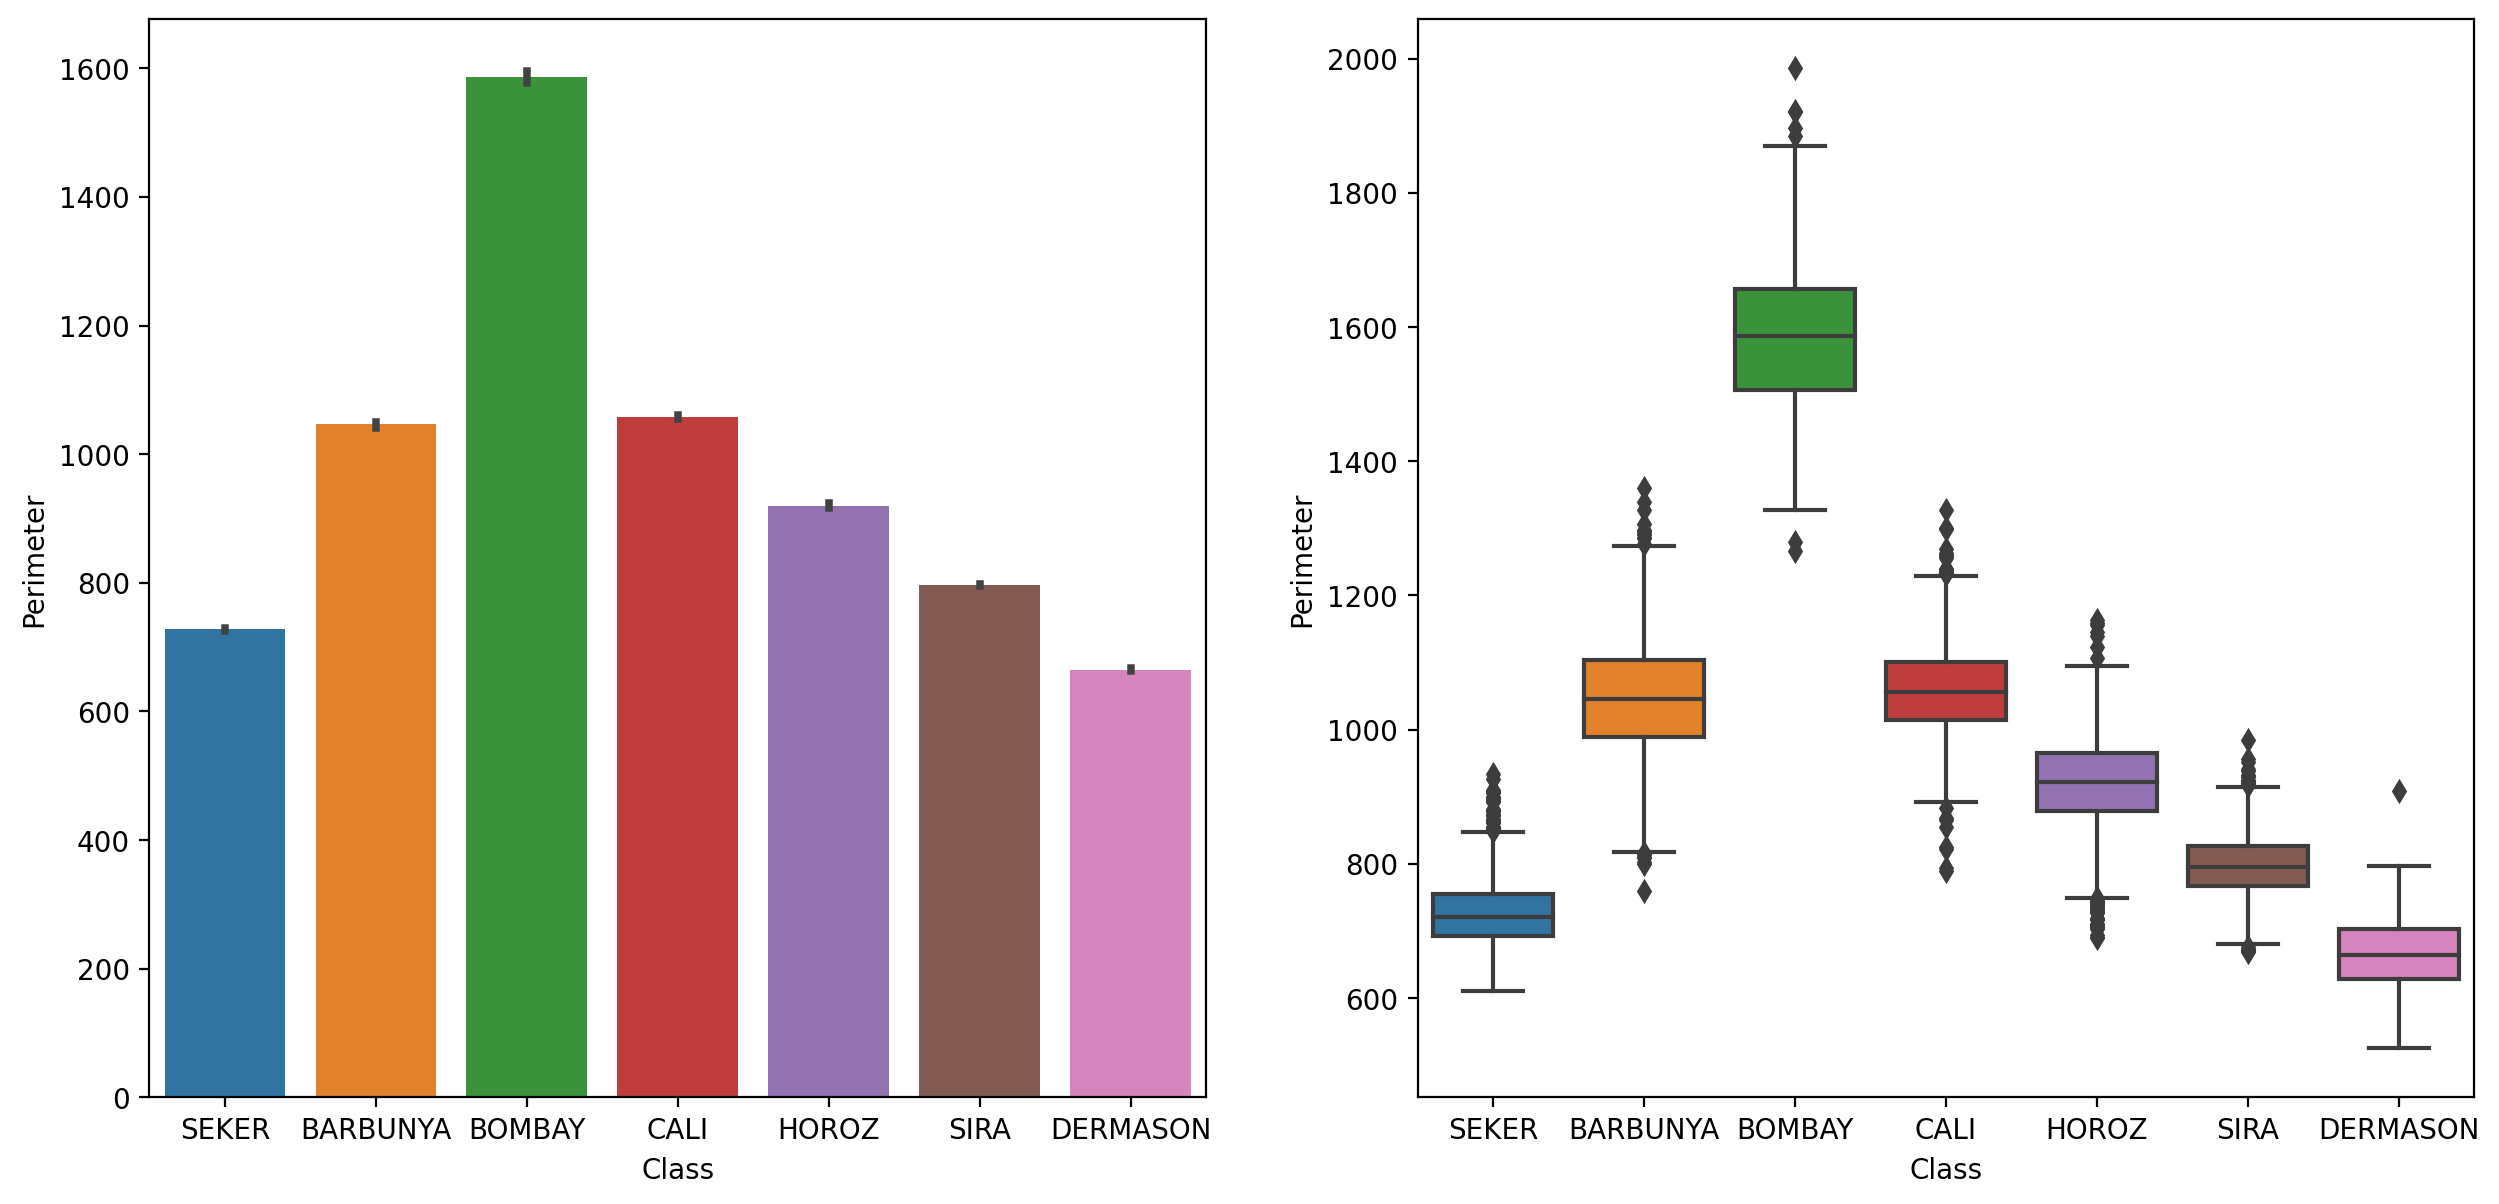

In [ ]:
plt.figure(figsize = (15,7), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x = df.Class, y = df.Perimeter)
plt.subplot(1,2,2)
sns.boxplot(x = df.Class, y = df.Perimeter)

- Chu vi của hạt đậu của Bombay nằm trong khoảng từ o - 1500 nhưng qua biểu đồ ngoại lệ ta thấy hạt kích thước bình thường nằm trong khoảng 1500 -1700 còn những hạt đột biến có chu vi lớn nằm 1900- 2000, hạt đột biến nhỏ của nó nằm trong khoảng 1200 - 1300
- Còn những hạt đột biến lớn của Seker nằm ở 820 - 900, hạt Barbunya có hạt đột biến nhỏ nằm trong khoảng 770 - 810 và đột biến lớn nằm trong 1300 - 1400
- Hạt Cali có đột biến lớn nằm trong 1200 -  1390 và hạt đột biến nhỏ nằm trong 750 - 900
- Hạt Horoz có hạt đột biến lớn 1170 - 1200, hạt đột biến nhỏ nằm 700 - 790
- Hạt Sira có hạt đột biến lớn 950 - 1000, hạt đột biến nhỏ nằm trong khoảng 750
- Hạt Dermason ổn định chỉ có số lượng hạt đột biến lớn nằm ở khoảng 950

<Axes: xlabel='Class', ylabel='AspectRation'>

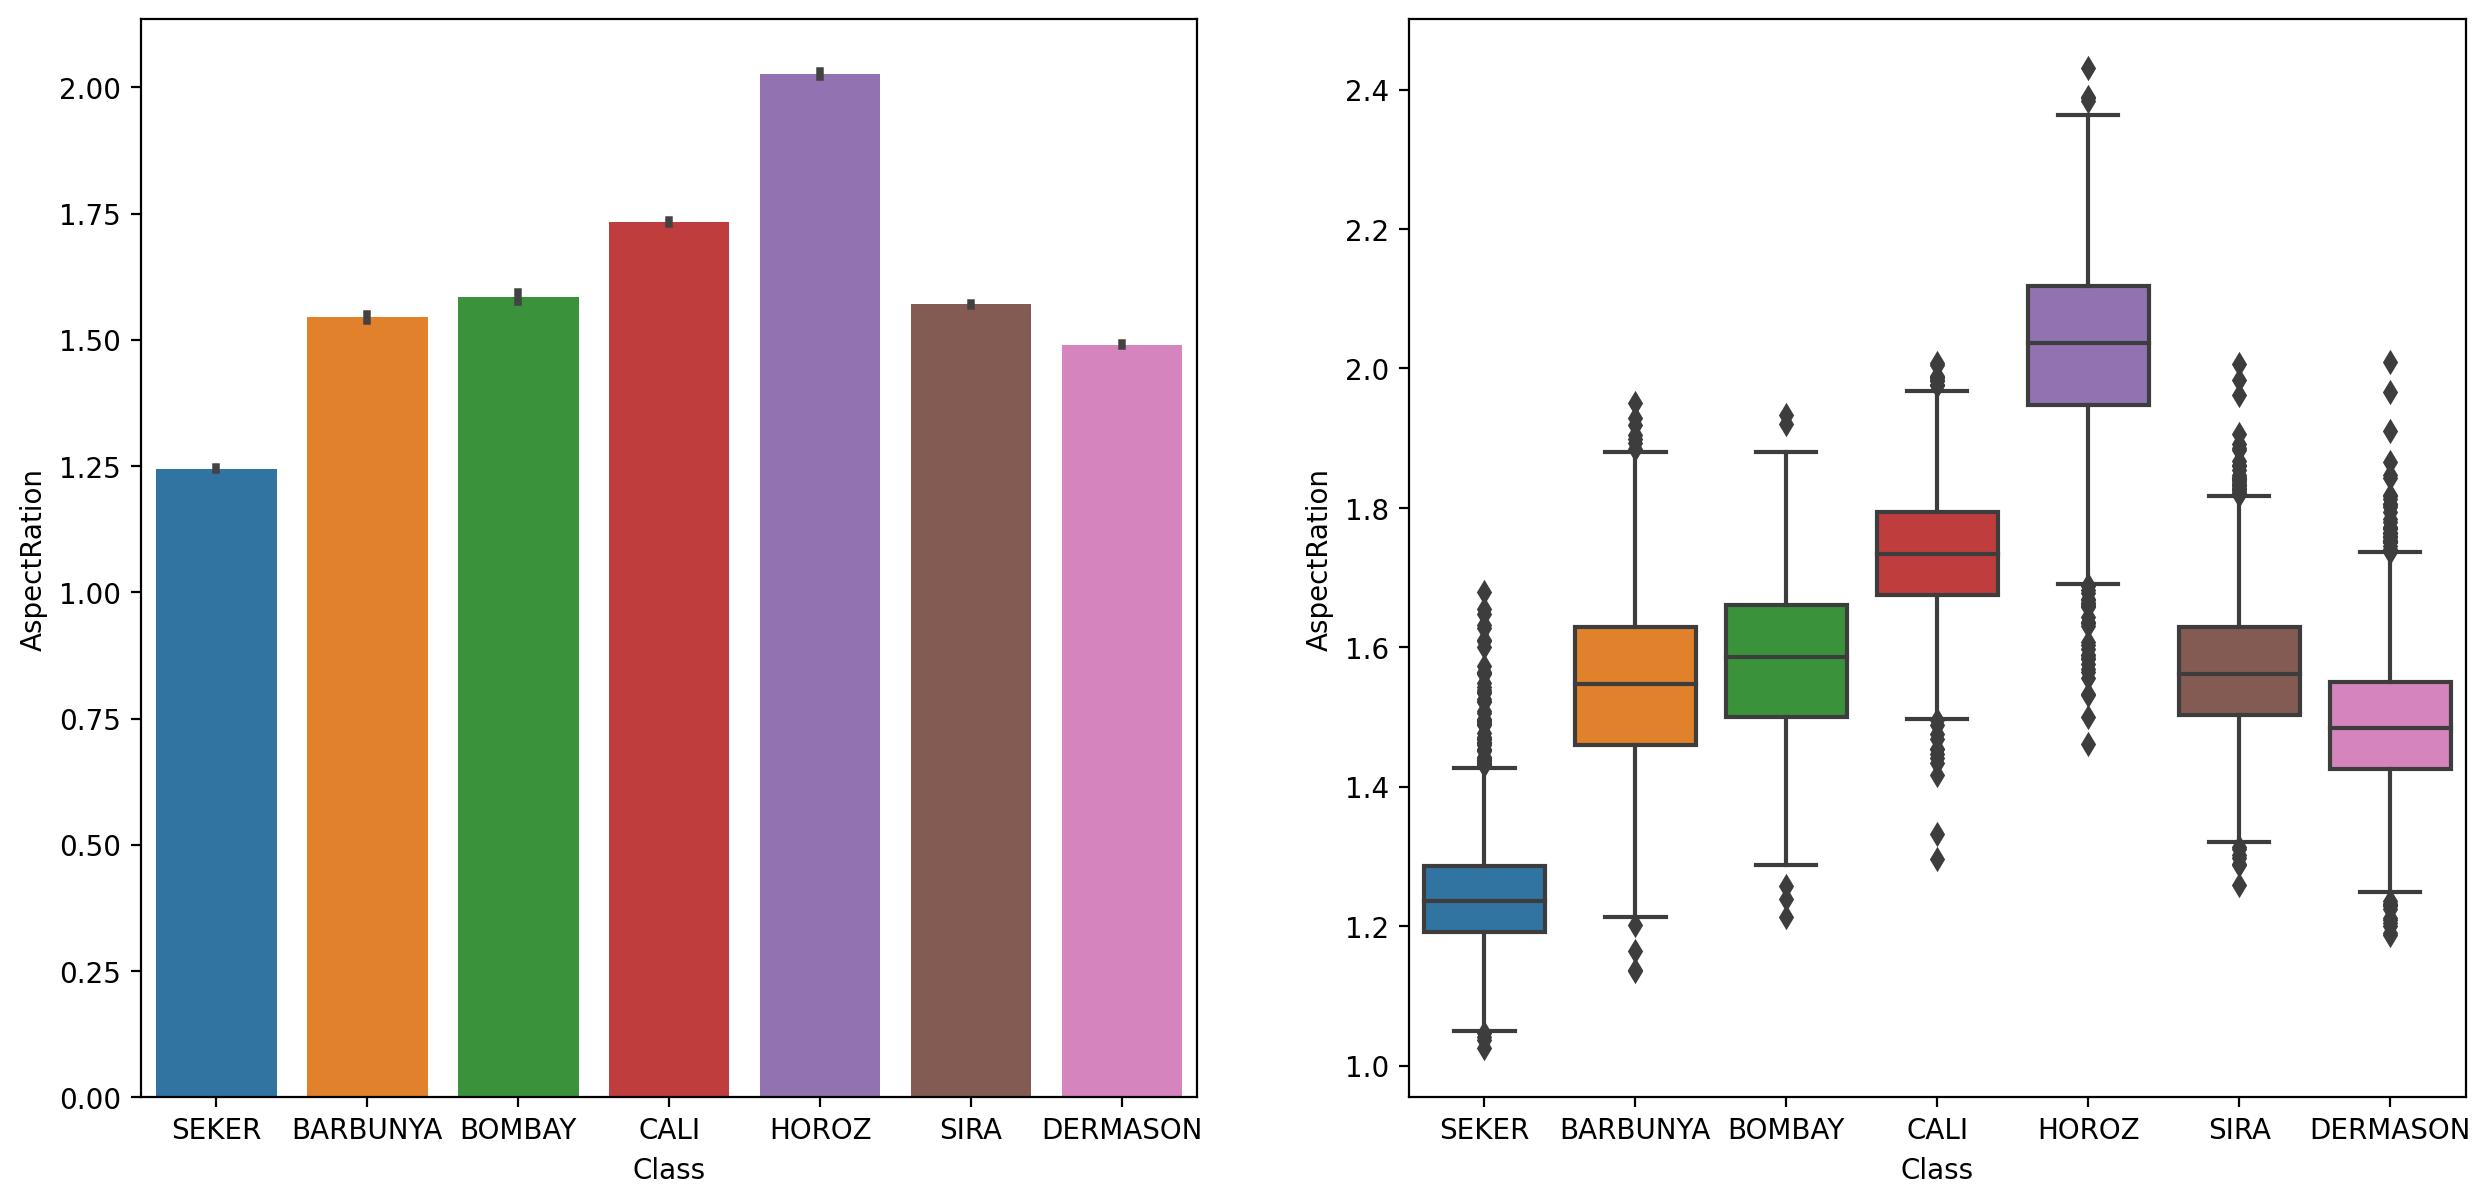

In [ ]:
plt.figure(figsize = (15,7), dpi = 200)
plt.subplot(1,2,1)
sns.barplot(x = df.Class, y = df.AspectRation)
plt.subplot(1,2,2)
sns.boxplot(x = df.Class, y = df.AspectRation)

- Xác định mối quan hệ giữa 2 MajorAxisLength và MinorAxisLength qua biểu đồ trên ta thấy được rằng miền giá trị của Horoz nằm ở 2.00 nhưng nó tập trung ở 1.9 - 2.1, còn lại là miền ngoại lệ của Horoz với chiều dài trục nhỏ nhiều hơn

<Axes: xlabel='Class', ylabel='Extent'>

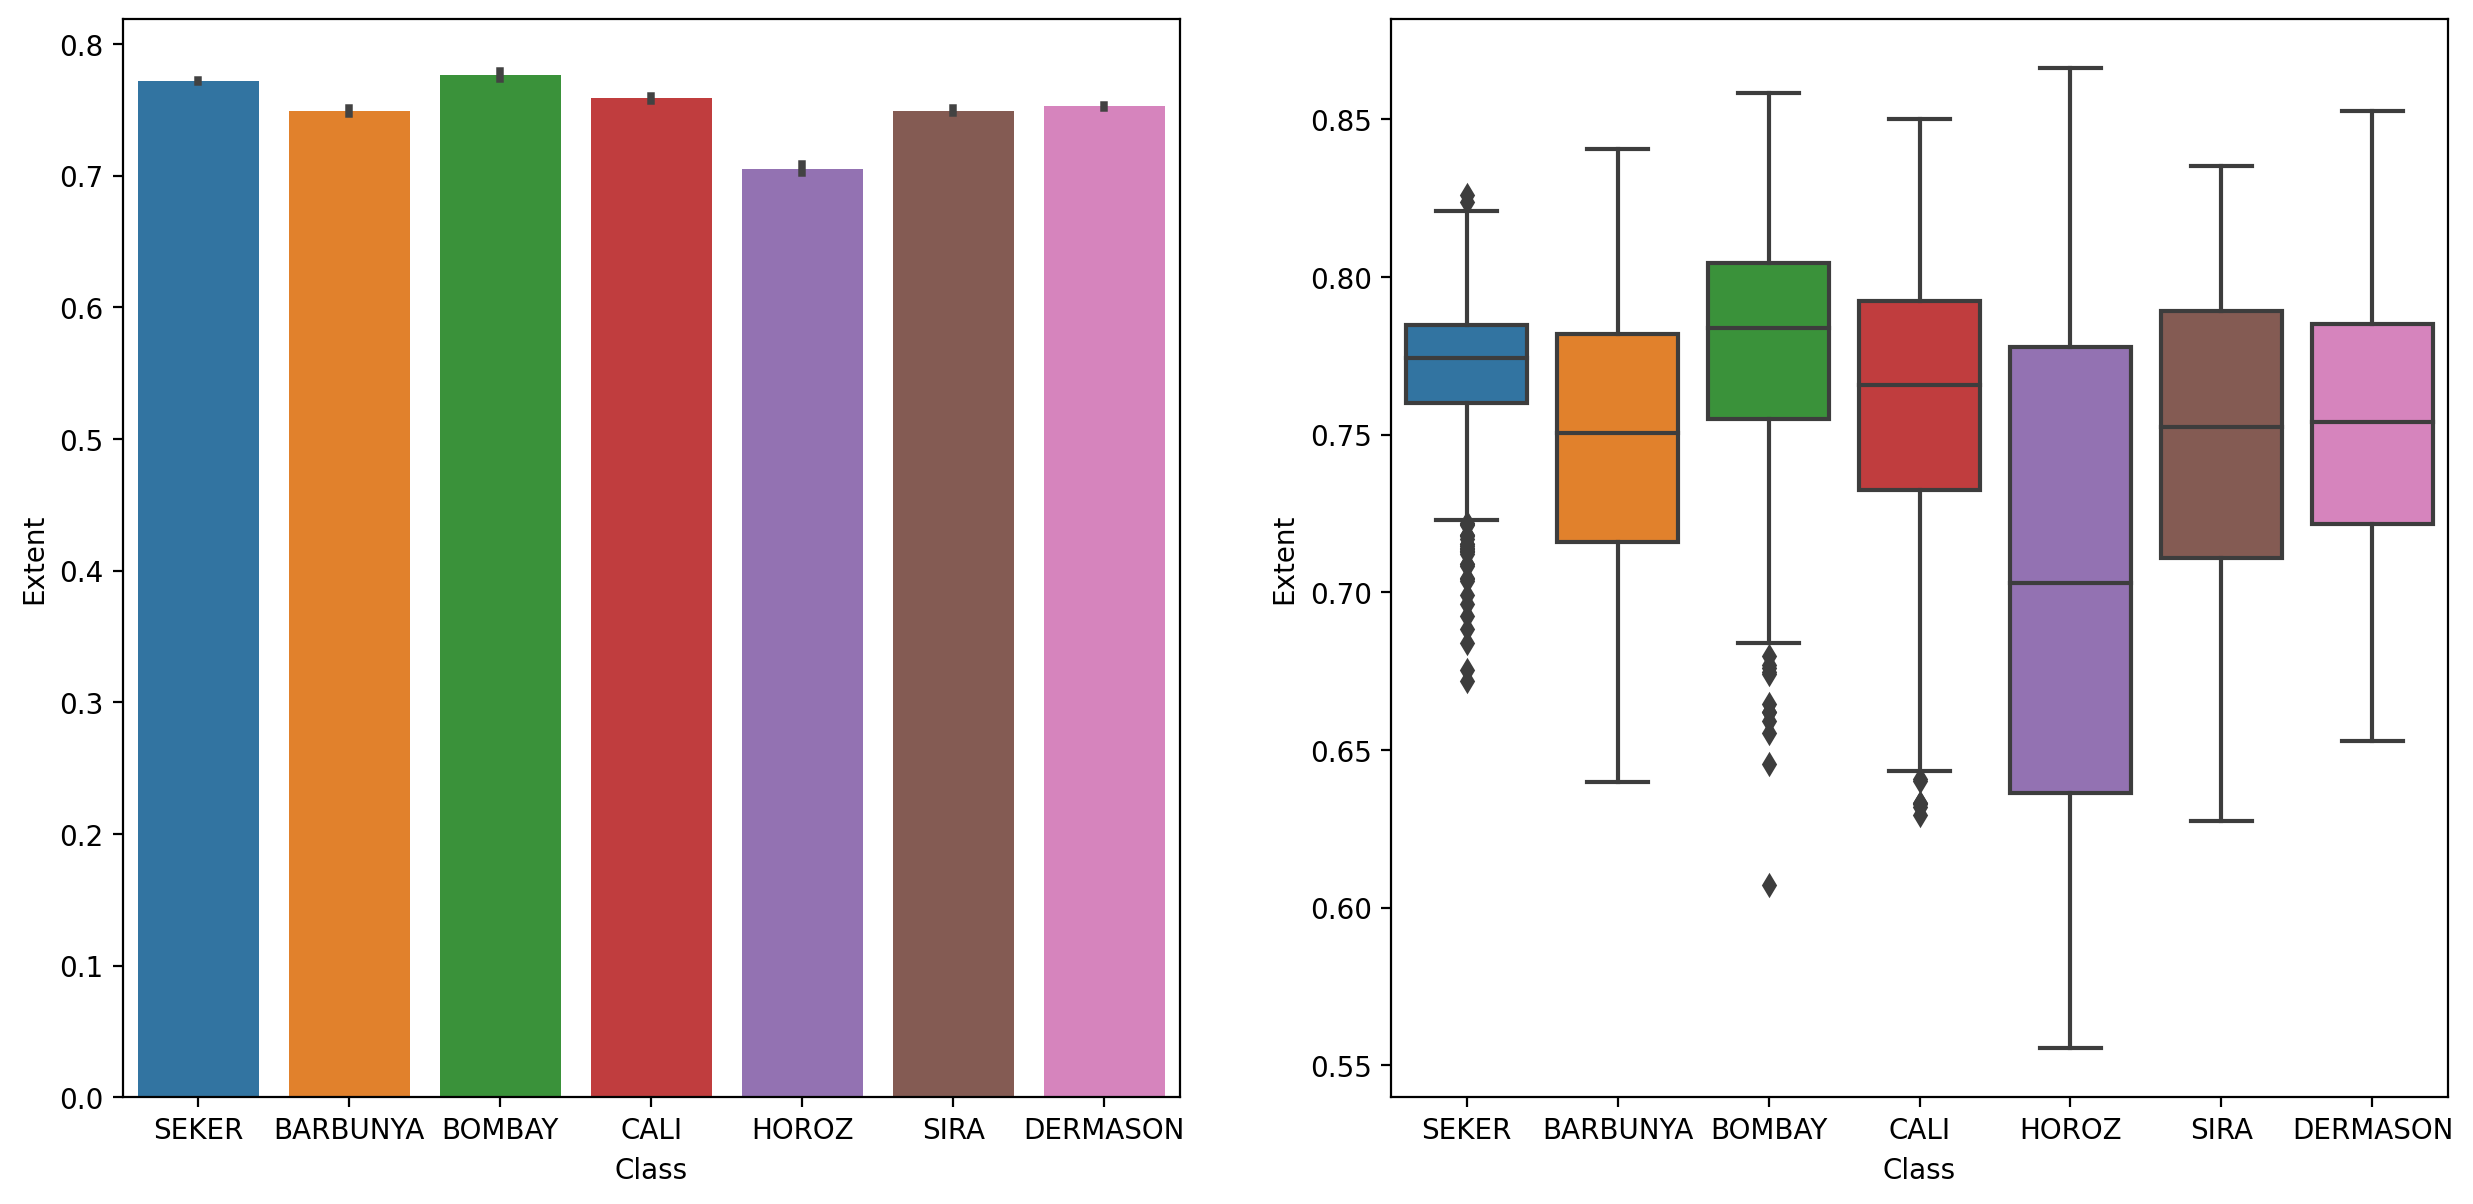

In [ ]:
plt.figure(figsize = (15,7), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(x = df.Class, y = df.Extent)
plt.subplot(1,2,2)
sns.boxplot(x = df.Class, y = df.Extent)

- Biểu đồ giá trị của độ lệch tâm của 7 class hầu như gần giống nhau, tuy nhiên có 3 class có độ lệch tâm ngoài vùng là:
+ Seker với 0.66 - 0.74
+ Bombay với độ lệch vùng ngoài từ 0.60 - 0.69
+ Cali với 0.64 - 0.65

<Axes: xlabel='Class', ylabel='Solidity'>

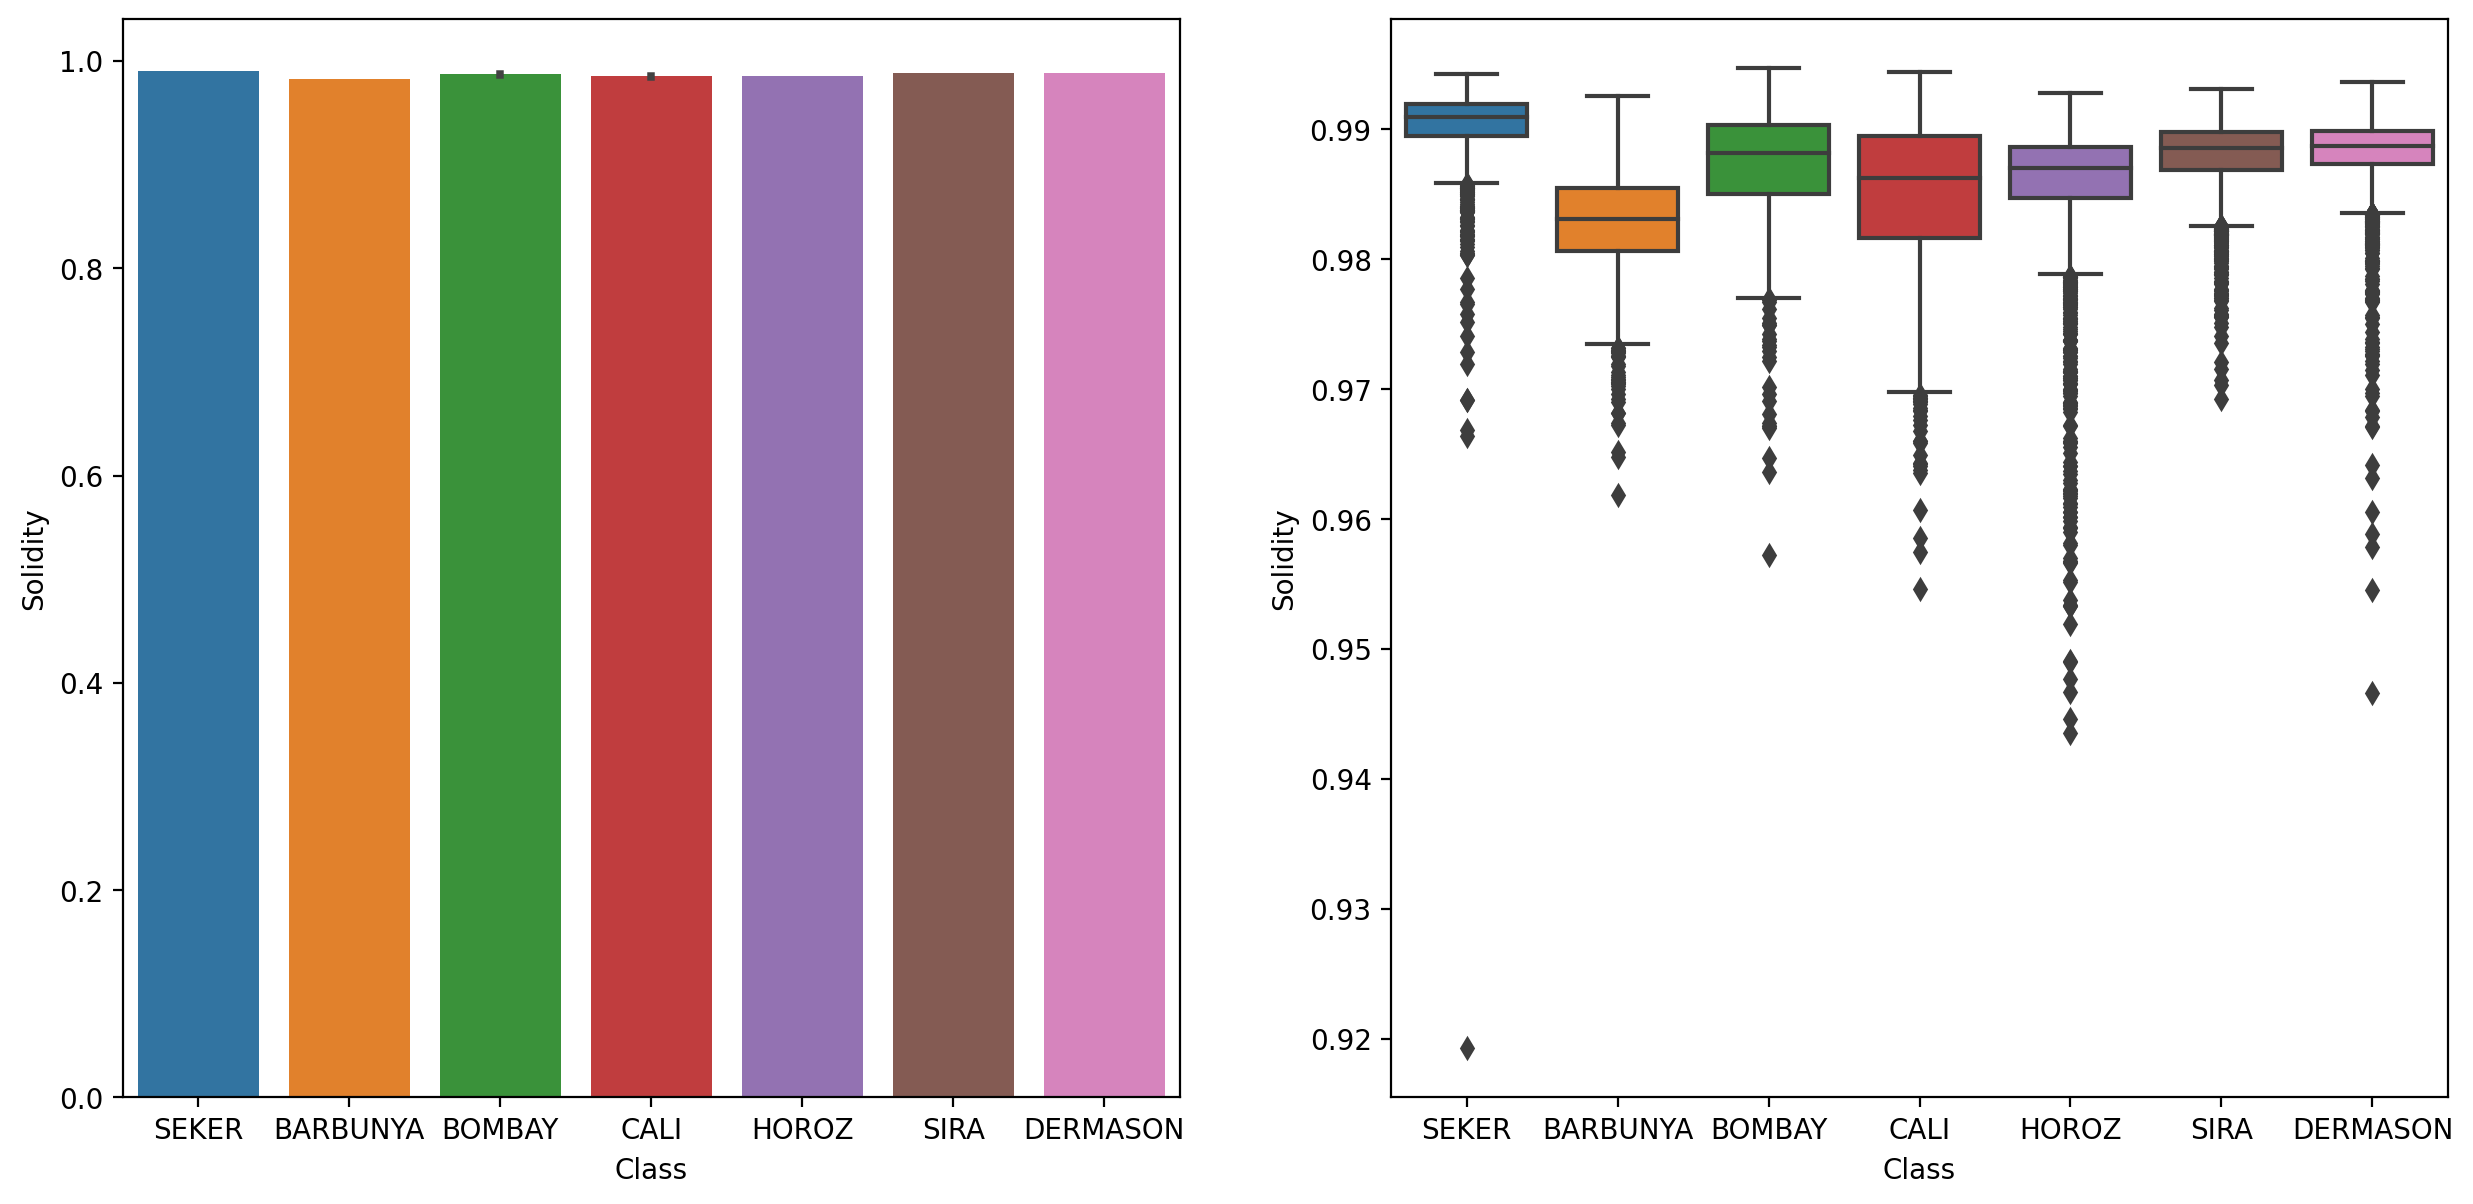

In [ ]:
plt.figure(figsize = (15,7), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(x = df.Class, y = df.Solidity)
plt.subplot(1,2,2)
sns.boxplot(x = df.Class, y = df.Solidity)

- Biểu đồ diện tích lồi với miền giá trị của 7 class gần bằng nhau.

<Axes: xlabel='Class', ylabel='roundness'>

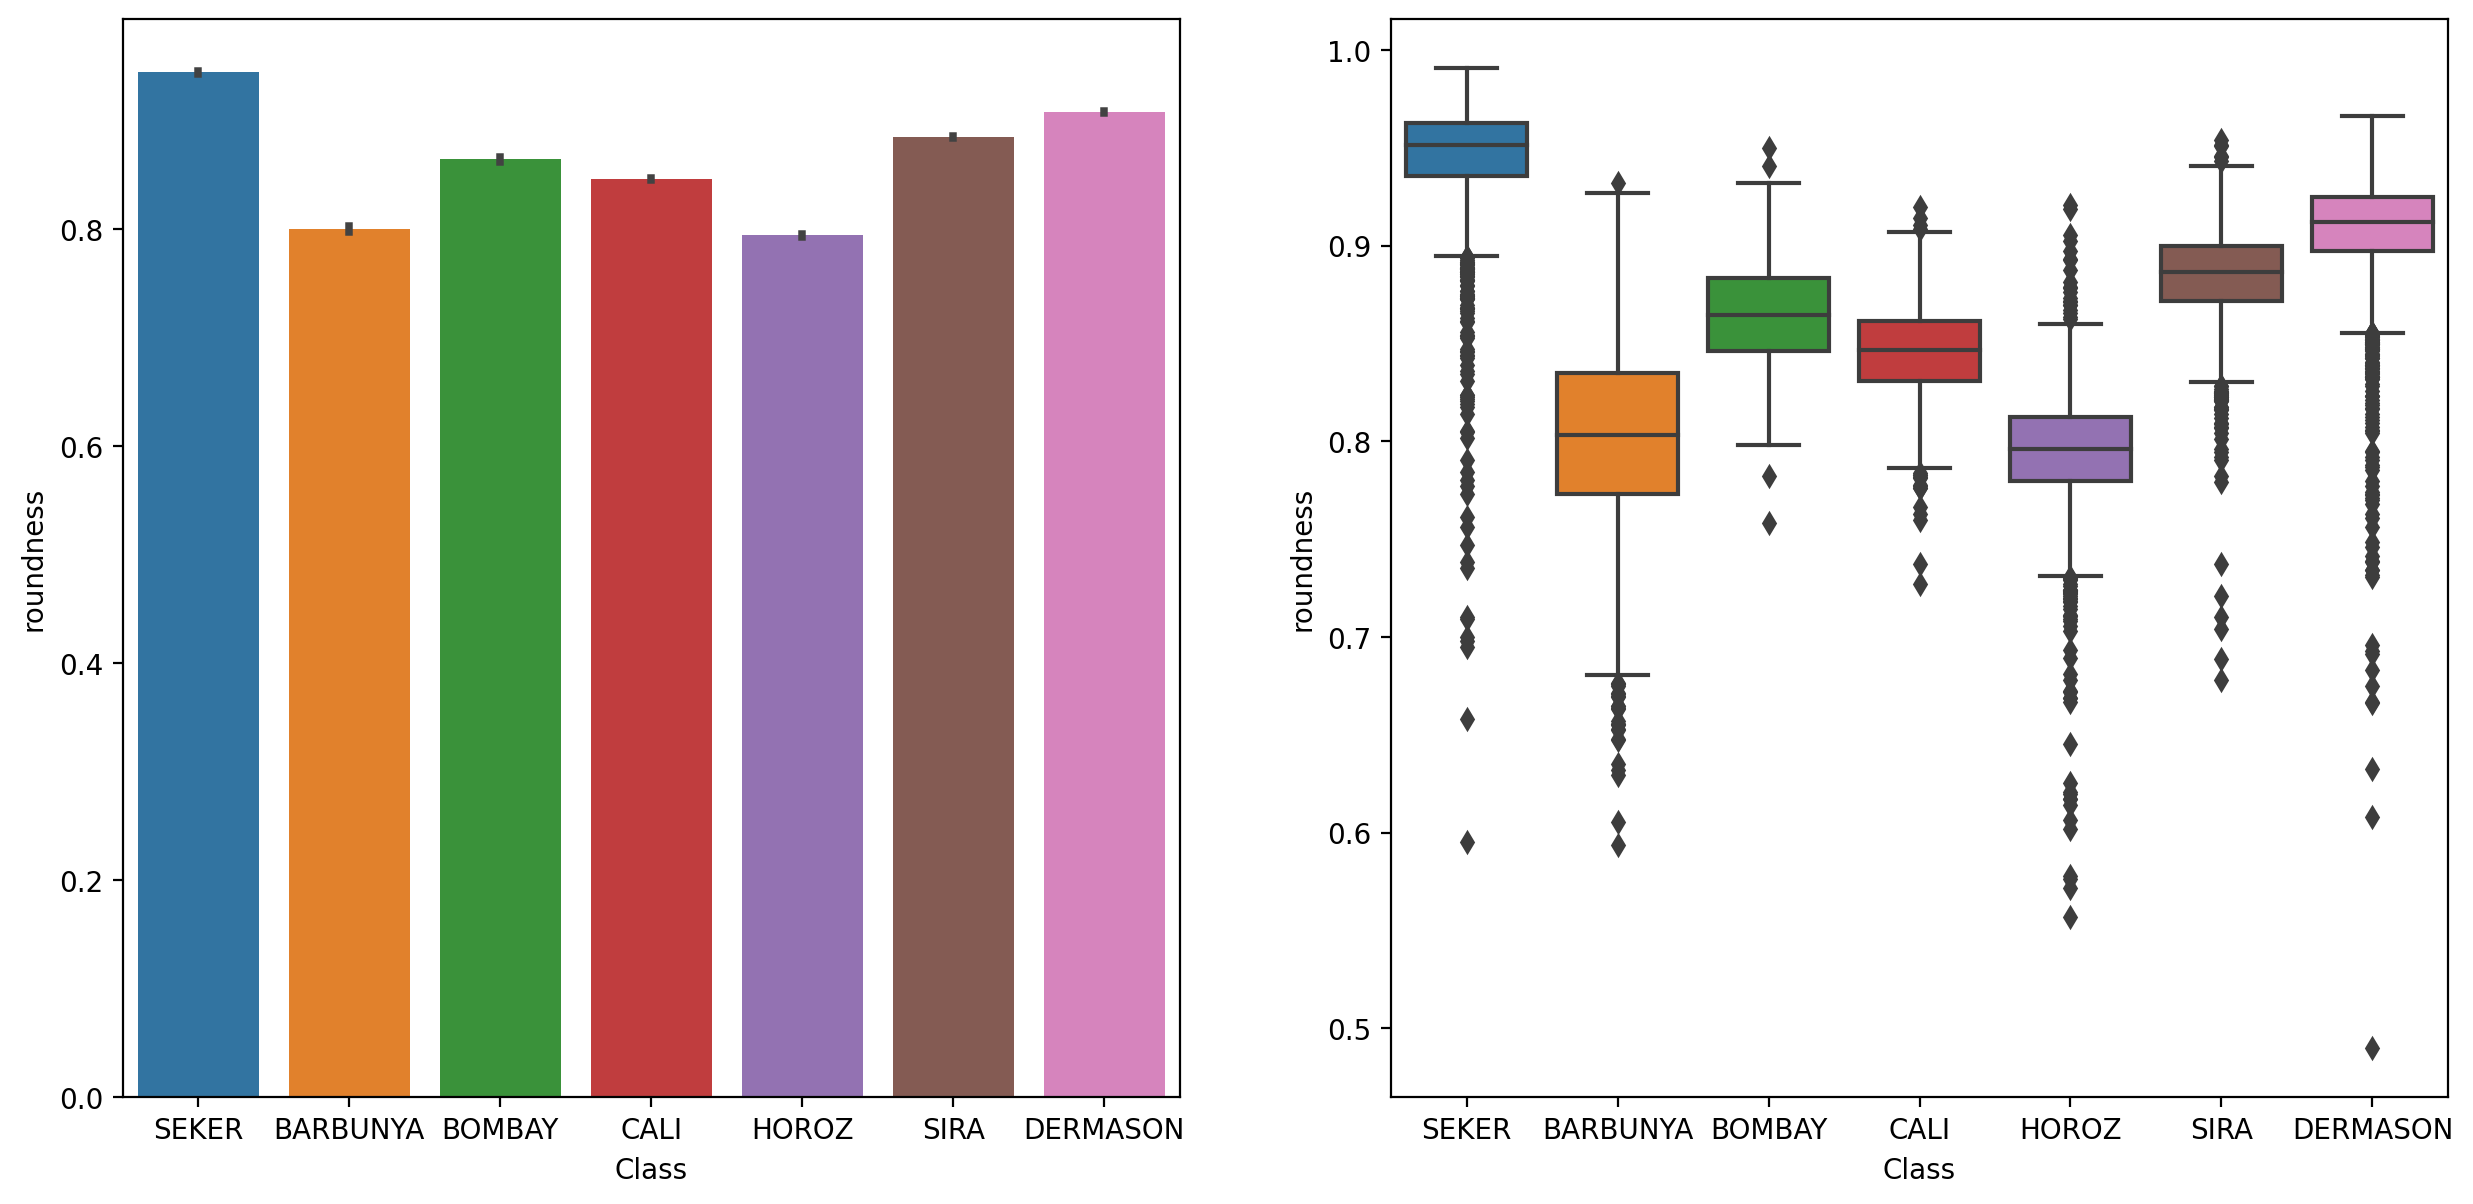

In [ ]:
plt.figure(figsize = (15,7), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(x = df.Class, y = df.roundness)
plt.subplot(1,2,2)
sns.boxplot(x = df.Class, y = df.roundness)

- Biểu đồ nói về hạt đậu tròn
- Dermason có những hạt méo nhiều nhất nằm trong vùng 0.5 -0.88

<Axes: xlabel='Class', ylabel='ShapeFactor1'>

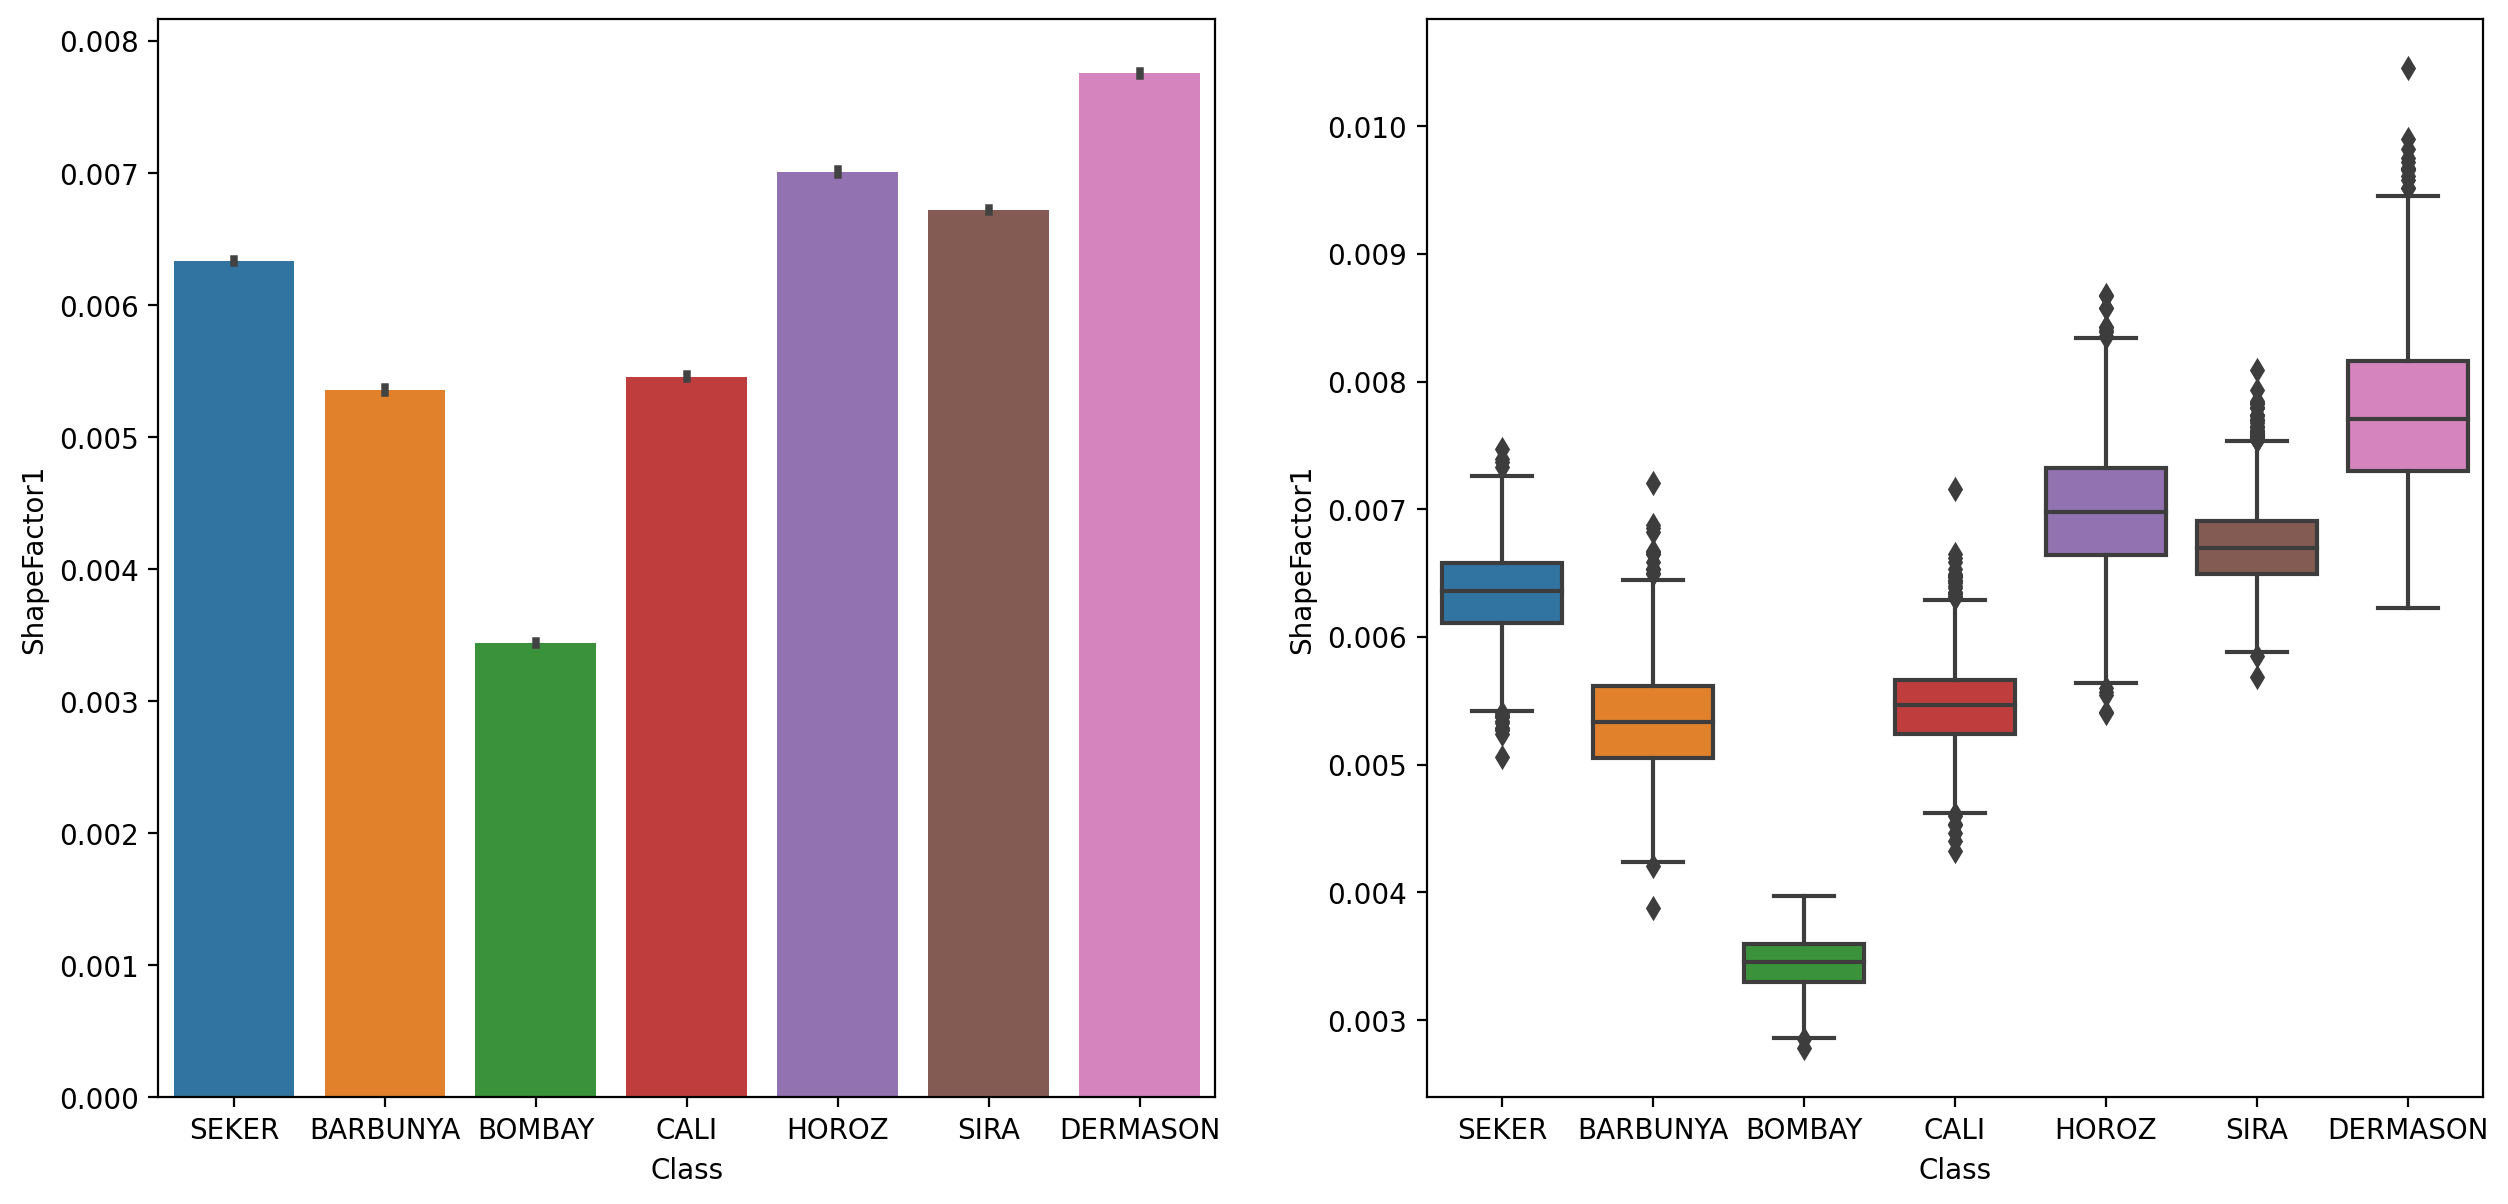

In [ ]:
plt.figure(figsize = (15,7), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(x = df.Class, y = df.ShapeFactor1)
plt.subplot(1,2,2)
sns.boxplot(x = df.Class, y = df.ShapeFactor1)

<Axes: xlabel='Class', ylabel='ShapeFactor2'>

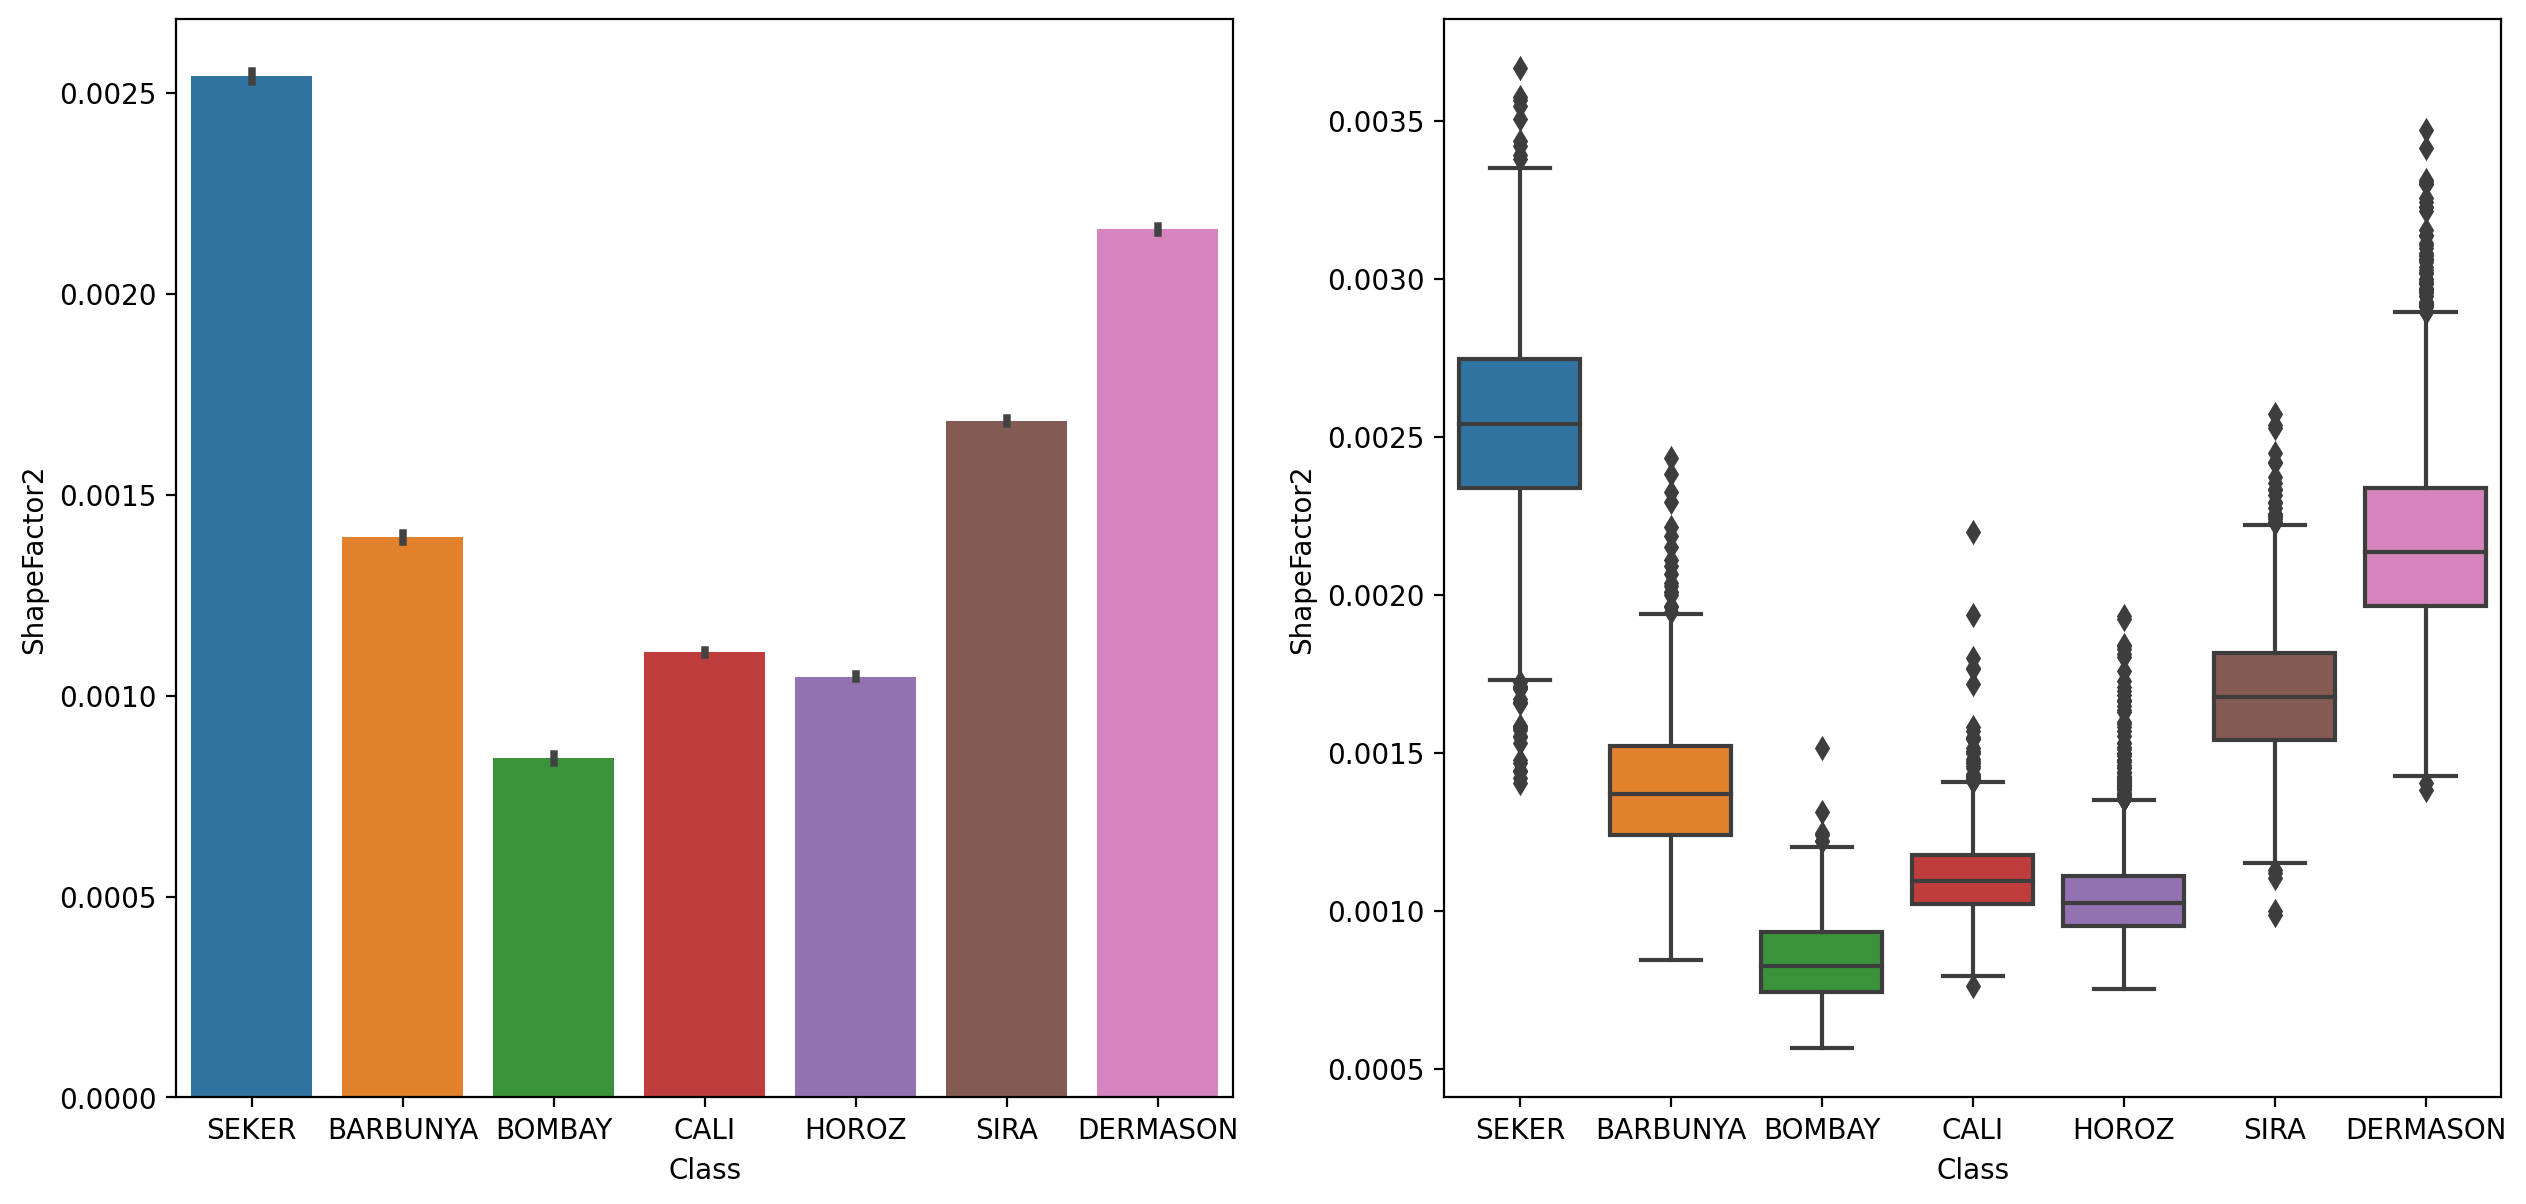

In [ ]:
plt.figure(figsize = (15,7), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(x = df.Class, y = df.ShapeFactor2)
plt.subplot(1,2,2)
sns.boxplot(x = df.Class, y = df.ShapeFactor2)

<Axes: xlabel='Class', ylabel='ShapeFactor3'>

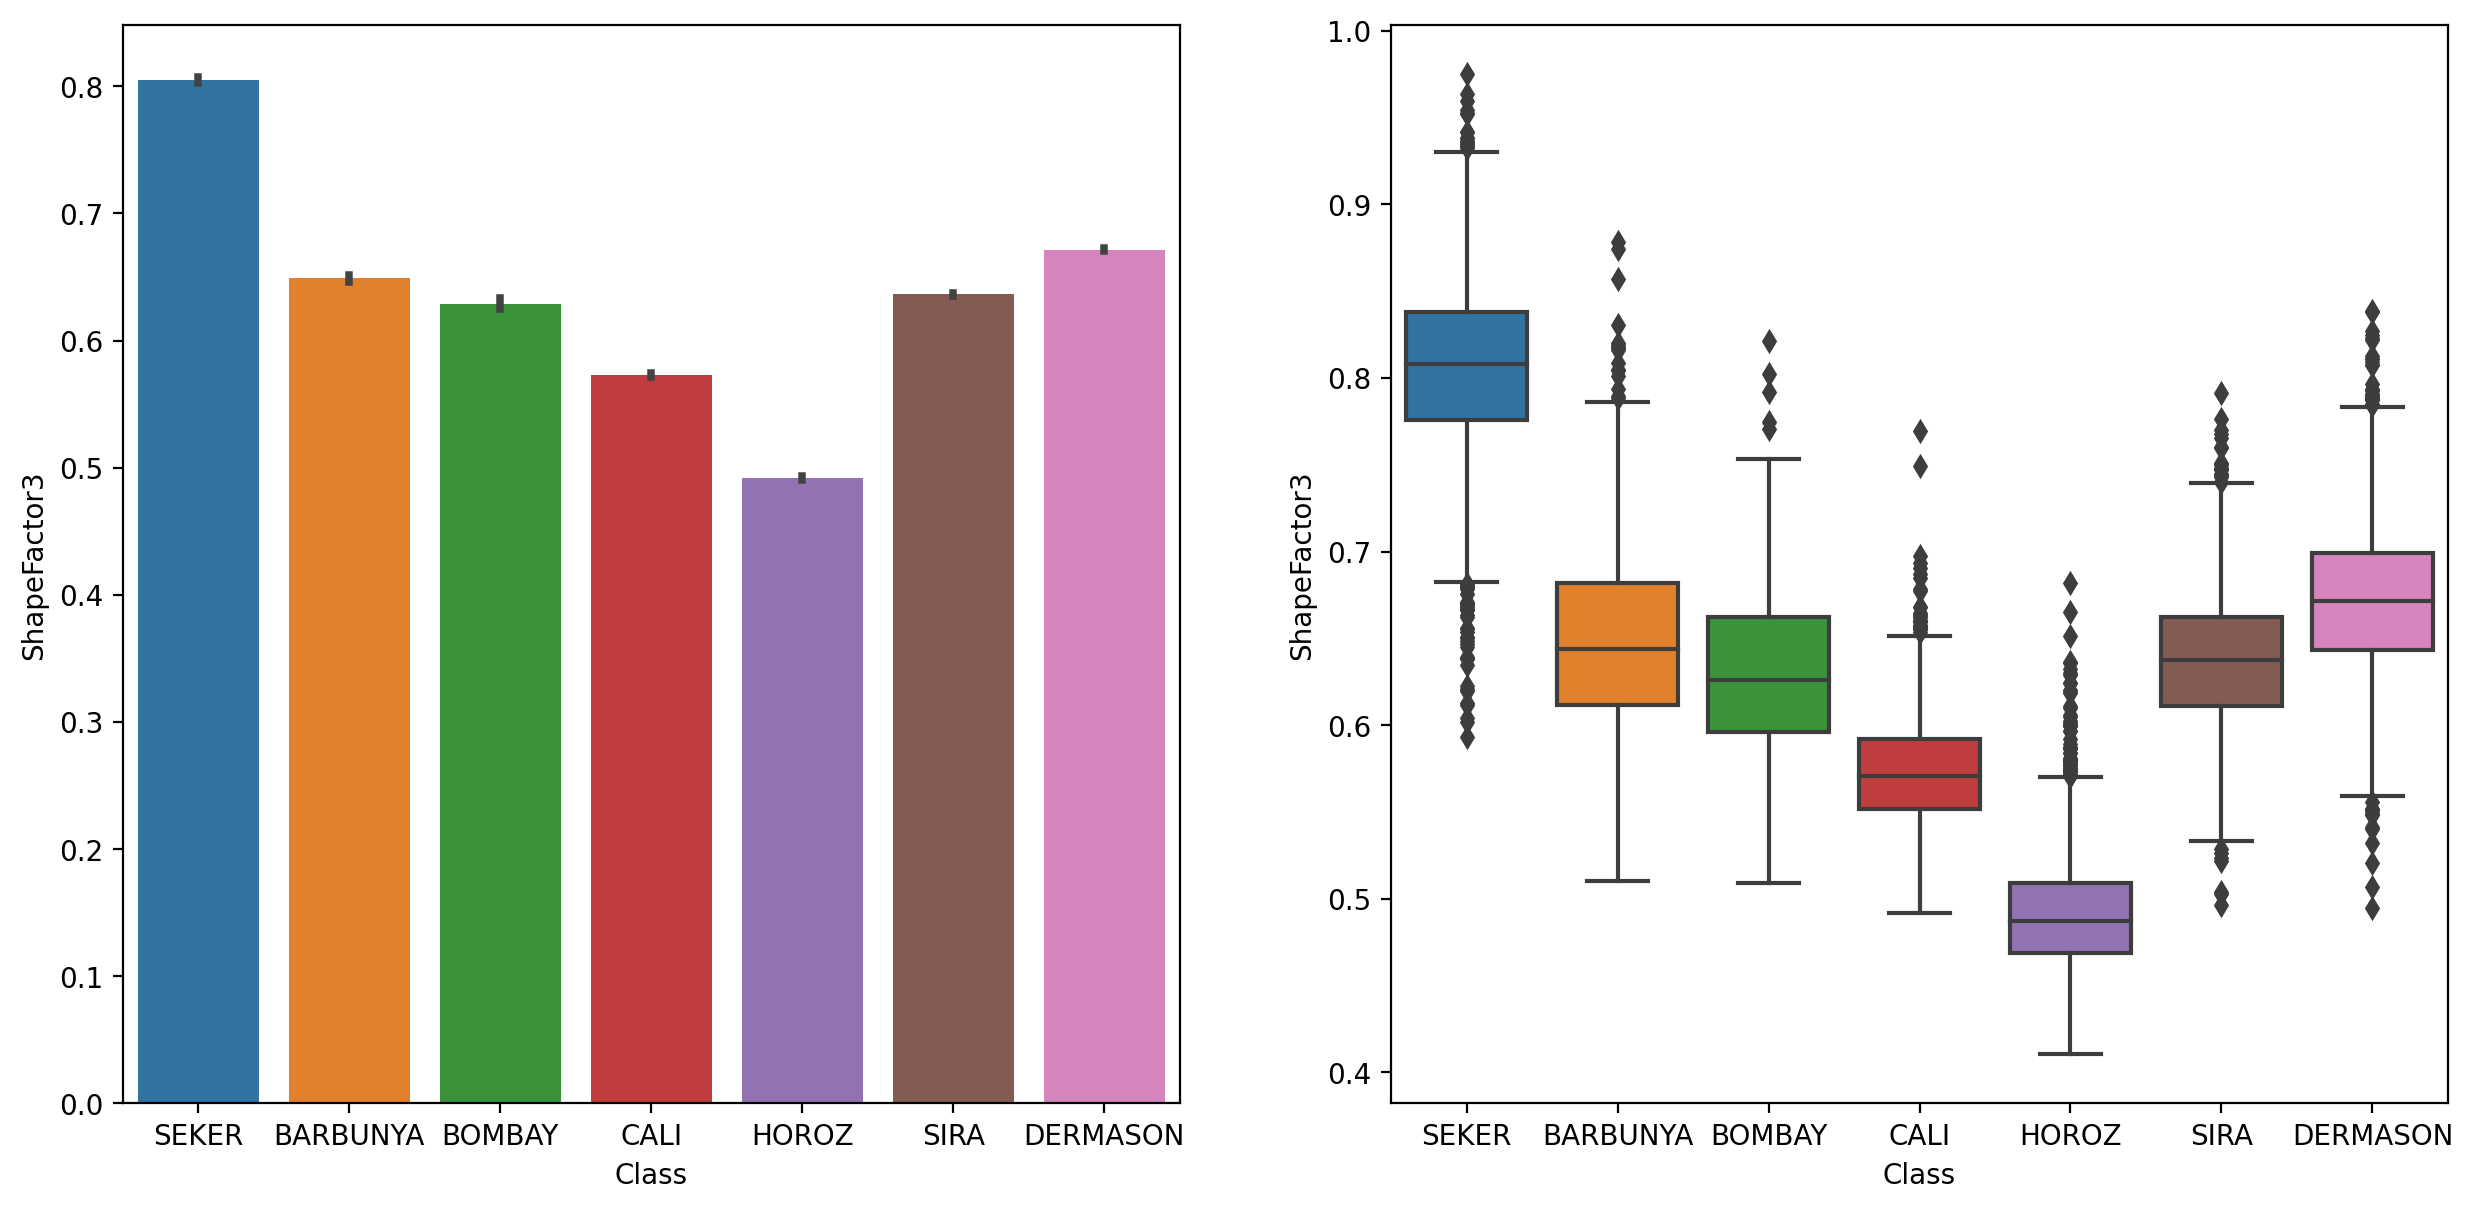

In [ ]:
plt.figure(figsize = (15,7), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(x = df.Class, y = df.ShapeFactor3)
plt.subplot(1,2,2)
sns.boxplot(x = df.Class, y = df.ShapeFactor3)

<Axes: xlabel='Class', ylabel='ShapeFactor4'>

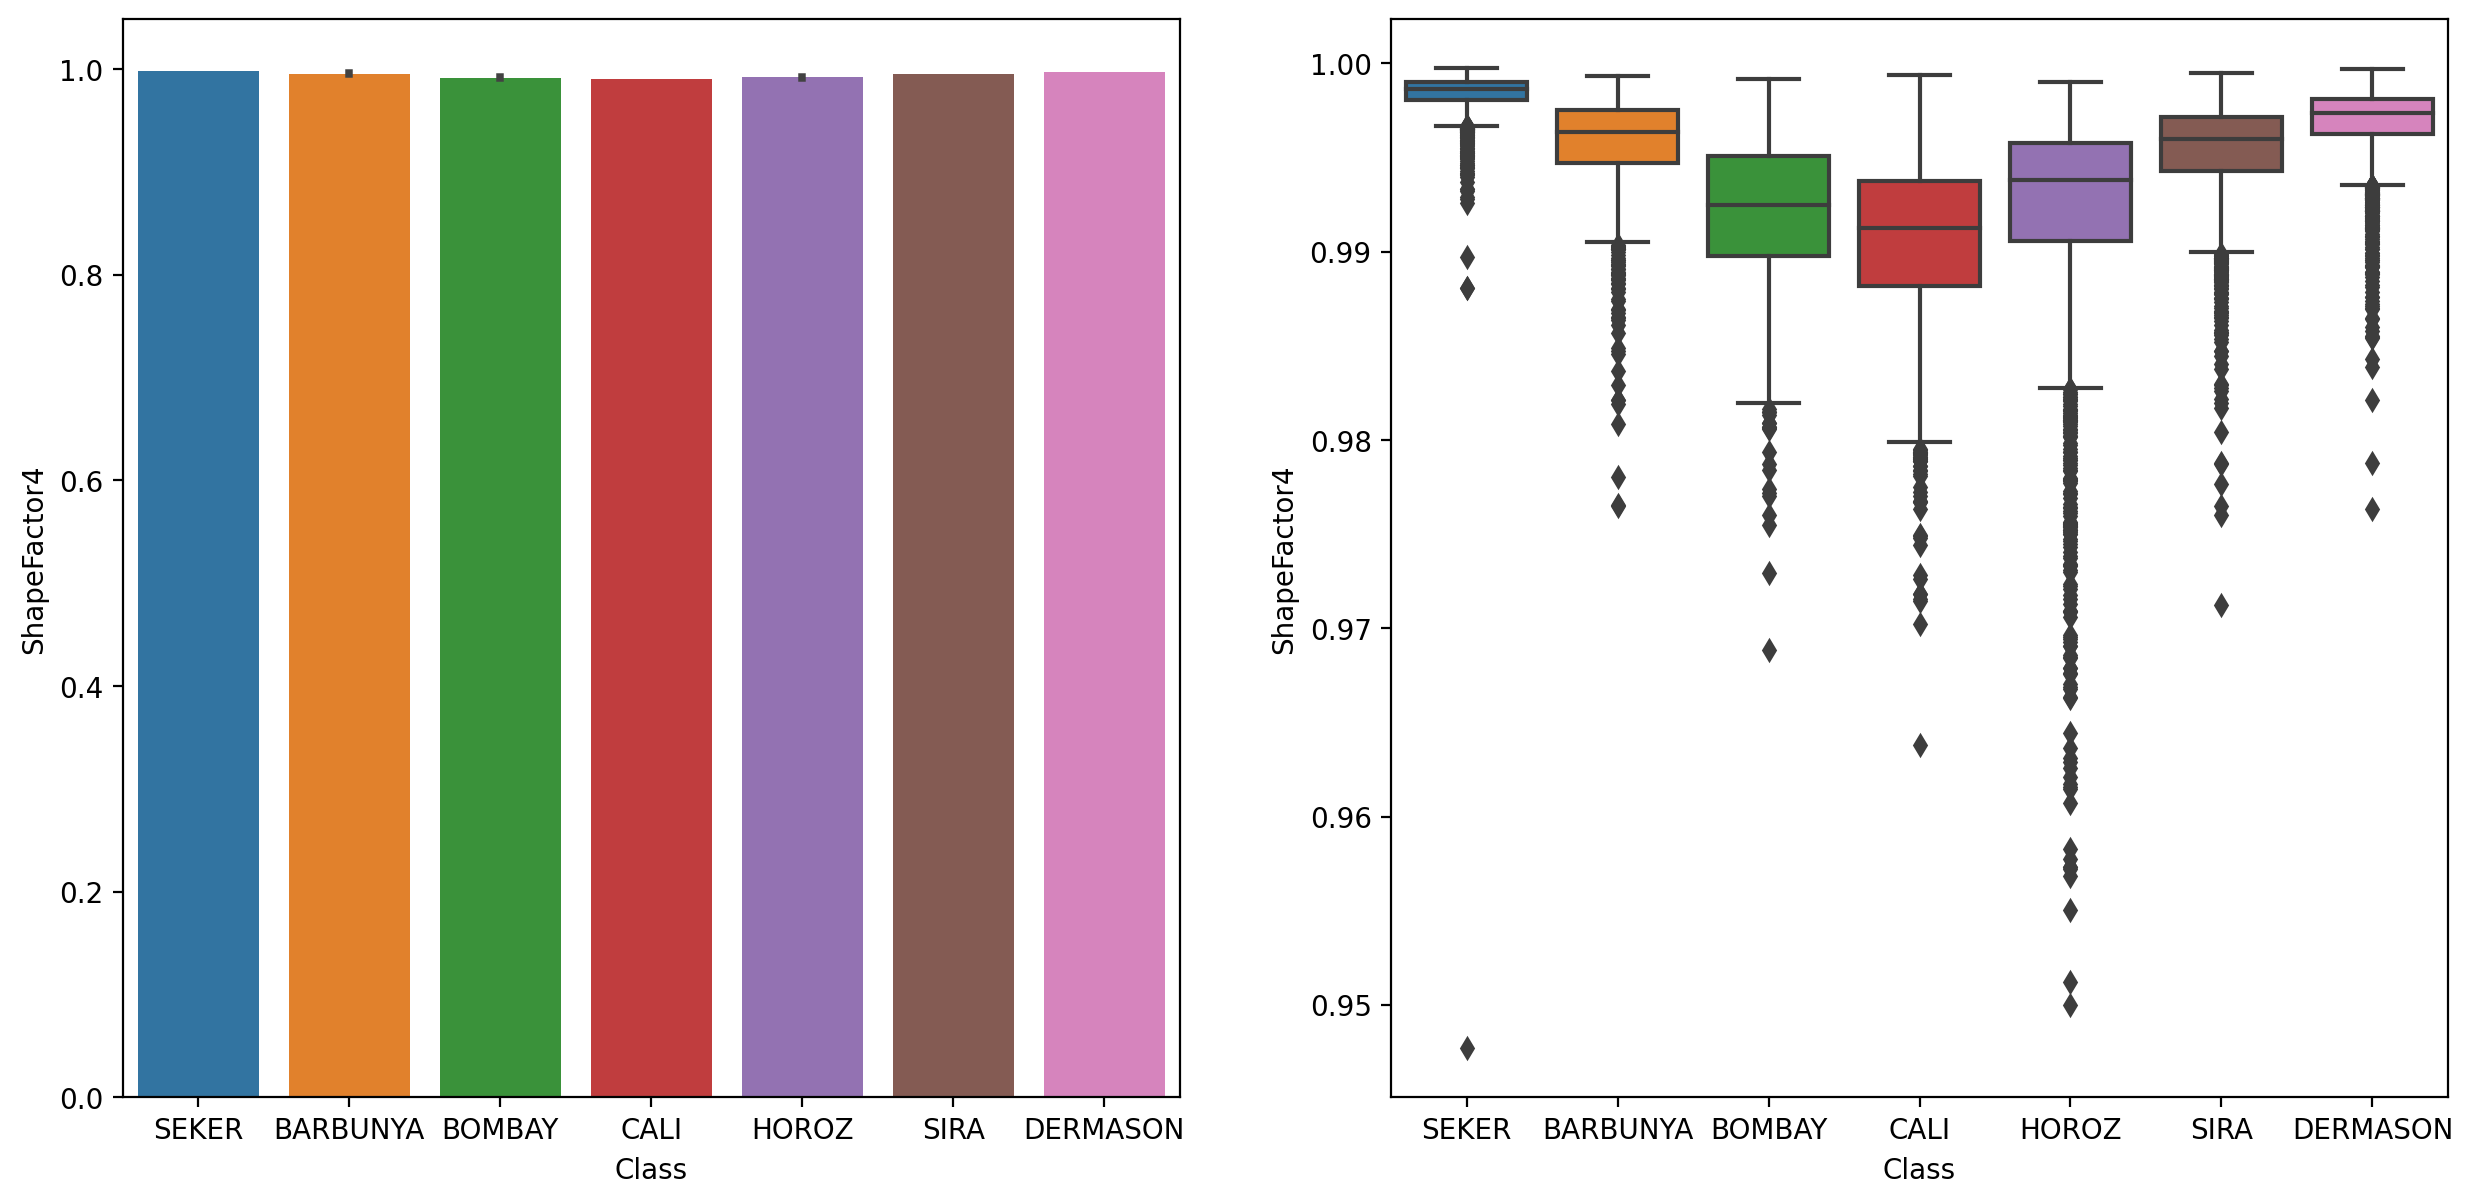

In [ ]:
plt.figure(figsize = (15,7), dpi = 200)

plt.subplot(1,2,1)
sns.barplot(x = df.Class, y = df.ShapeFactor4)
plt.subplot(1,2,2)
sns.boxplot(x = df.Class, y = df.ShapeFactor4)

<Axes: >

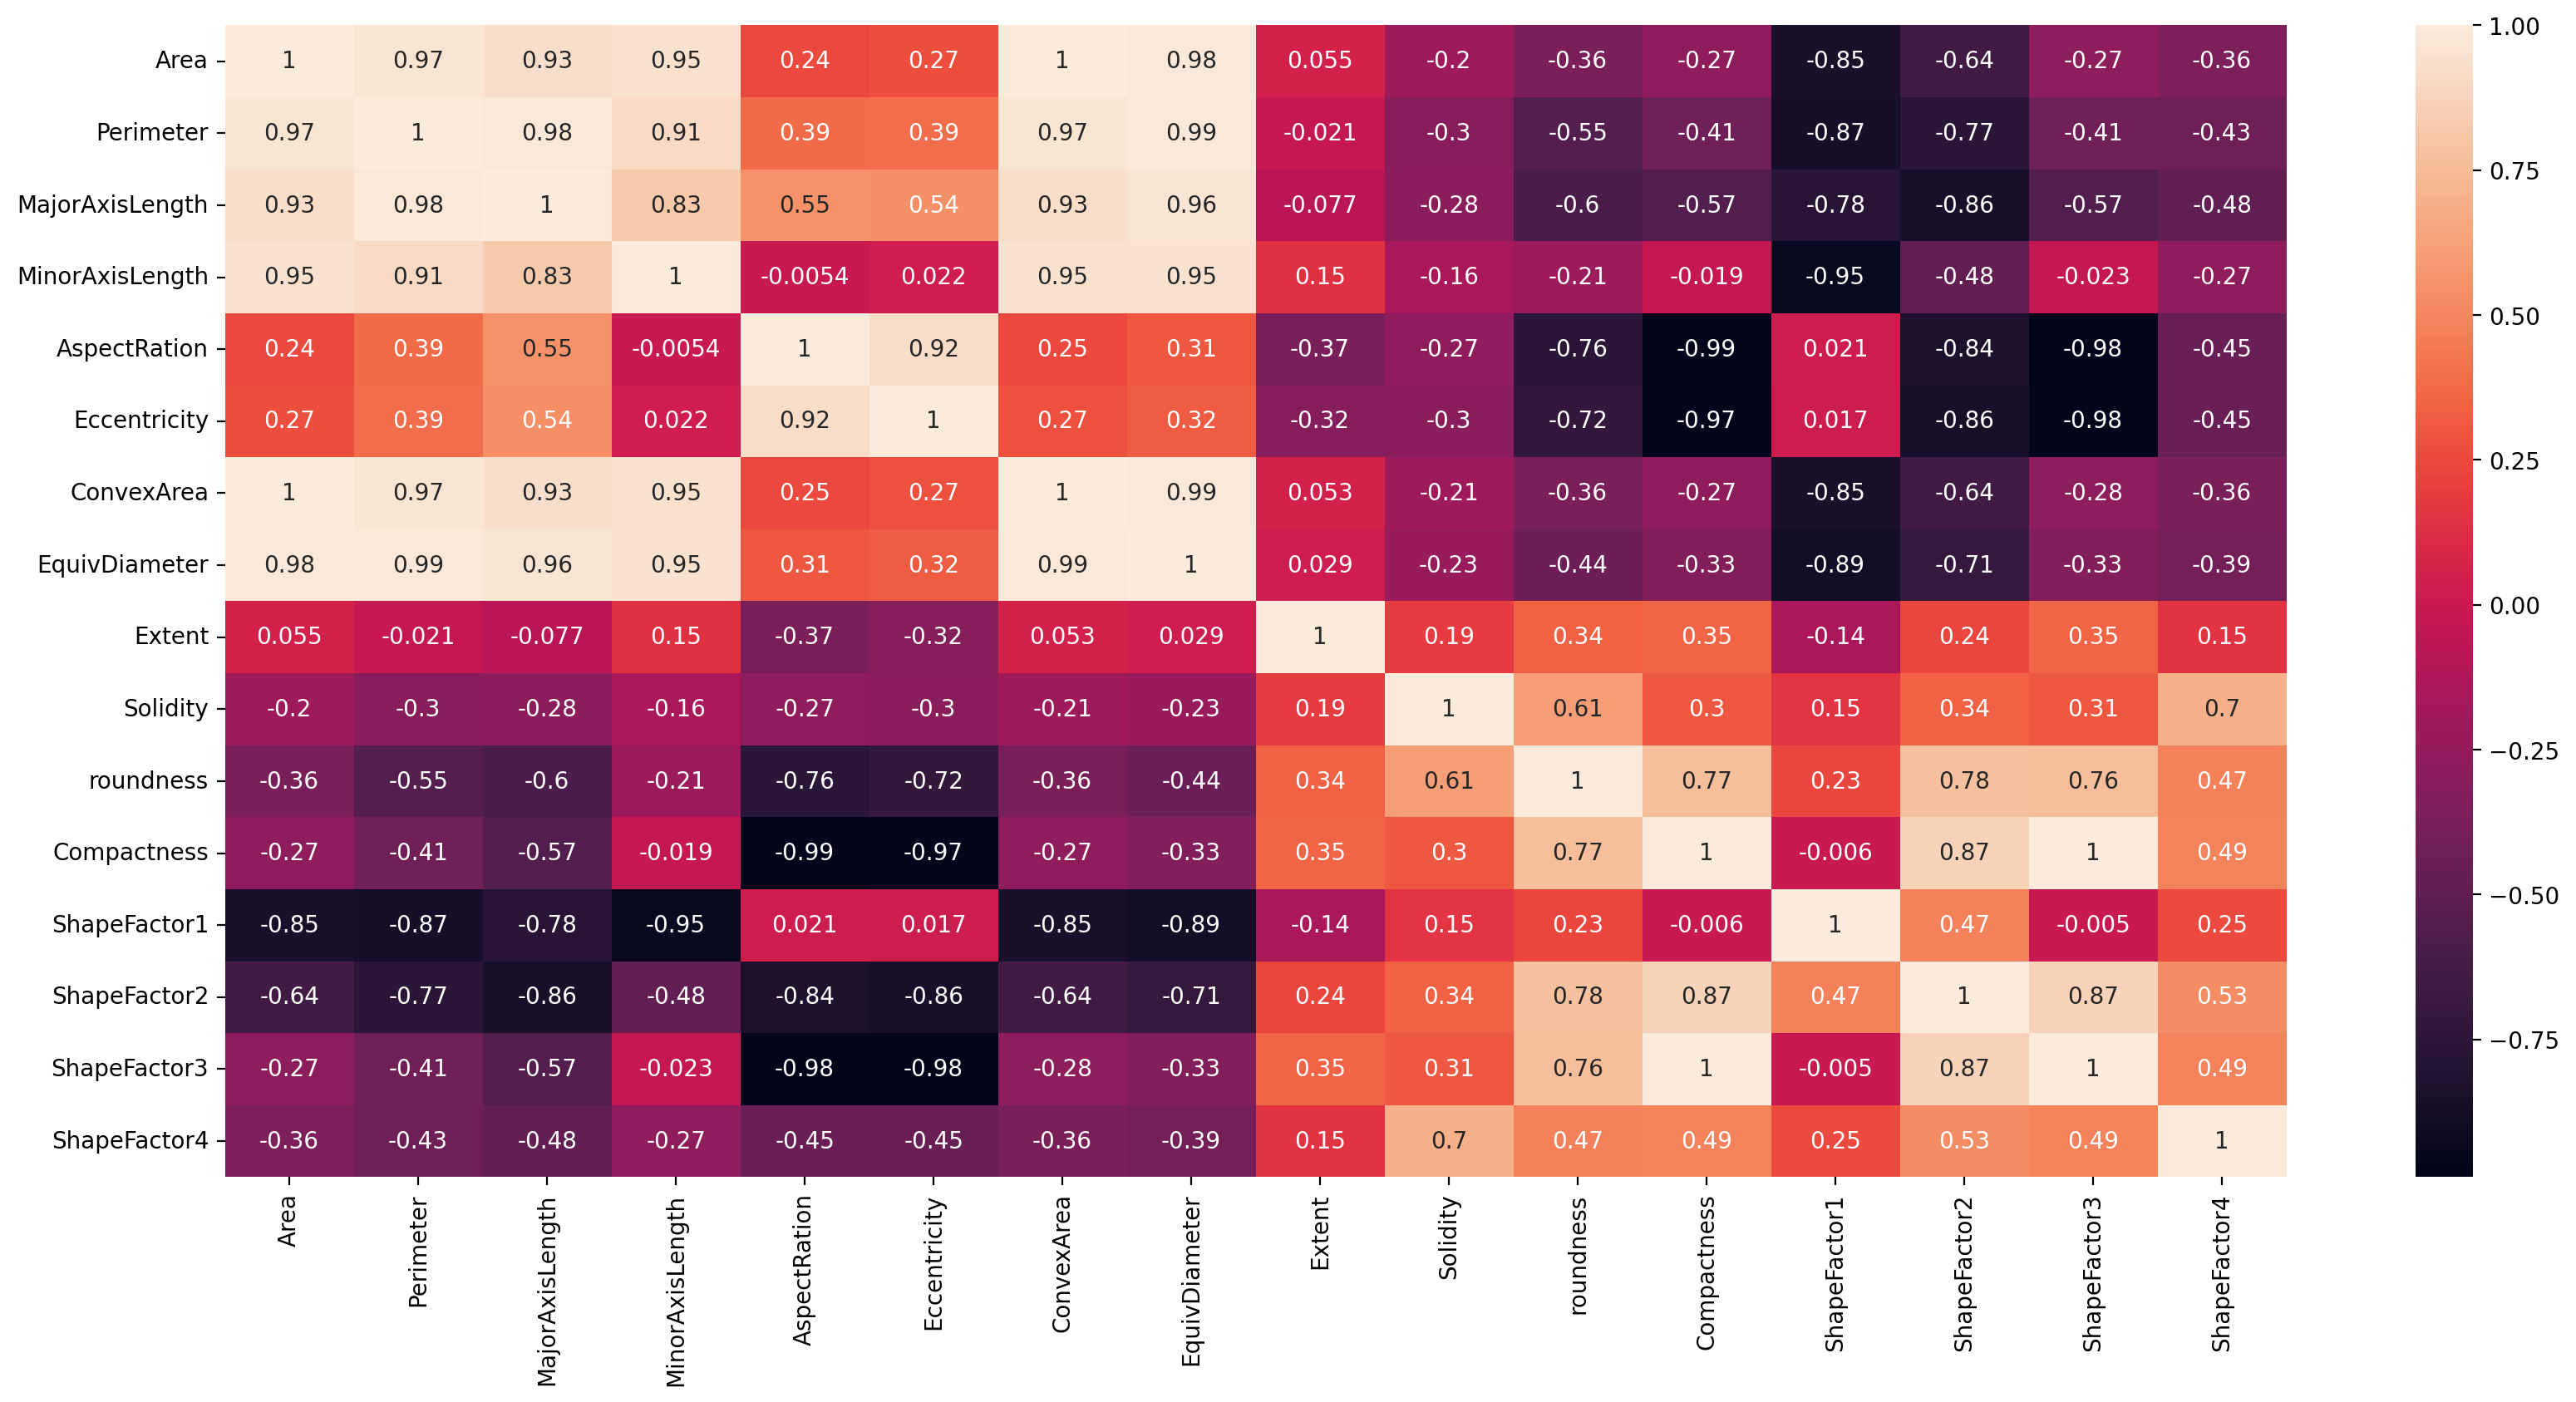

In [ ]:
plt.figure(figsize = (20,9), dpi = 200)
sns.heatmap(df.corr(), annot = True)

- Dựa vào heatmap, những feature có thể không quan trọng đối với biến target là: Extent, solidity


In [ ]:
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class']) #tạo labelencoder chuyển đổi thành dạng số
df.head(30)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,5
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,5
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,5
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,5
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
df['Area'] = scaler.fit_transform(df[['Area']])

# Fit the scaler to your data and transform it
df['ConvexArea'] = scaler.fit_transform(df[['ConvexArea']])

df['Perimeter'] = scaler.fit_transform(df[['Perimeter']])

df['MajorAxisLength'] = scaler.fit_transform(df[['MajorAxisLength']])

df['MinorAxisLength'] = scaler.fit_transform(df[['MinorAxisLength']])

# X_normalized contains your normalized data
# chuyển số lớn thành giá trị nhỏ

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.034053,0.058574,0.044262,0.152142,1.197191,0.549812,0.033107,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,0.035500,0.077557,0.030479,0.178337,1.097356,0.411785,0.034991,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,0.038259,0.068035,0.052633,0.158190,1.209713,0.562727,0.037126,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,0.040940,0.082942,0.048548,0.177691,1.153638,0.498616,0.041389,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,0.041504,0.065313,0.032862,0.200679,1.060798,0.333680,0.040123,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [ ]:
#cols = ['Area', 'Perimeter', 'AspectRation', 'Extent', 'Solidity', 'roundness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor4']
X = df.drop('Class', axis = 1)
y = df[['Class']]

mã hóa này chia thành hai phần dữ liệu: một phần (X) chứa các đặc tính và một phần (Y) chứa mục tiêu biến để chuẩn bị cho học máy hoặc loại phân tích nhiệm vụ.

In [ ]:
X.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,1.197191,0.549812,0.033107,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,0.035500,0.077557,0.030479,0.178337,1.097356,0.411785,0.034991,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,0.038259,0.068035,0.052633,0.158190,1.209713,0.562727,0.037126,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,0.040940,0.082942,0.048548,0.177691,1.153638,0.498616,0.041389,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,0.041504,0.065313,0.032862,0.200679,1.060798,0.333680,0.040123,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
5,0.042097,0.075441,0.052155,0.174711,1.171067,0.520401,0.040878,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236
6,0.042943,0.099475,0.049435,0.182200,1.146768,0.489478,0.042403,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049
7,0.043122,0.071880,0.052940,0.178345,1.165591,0.513760,0.041896,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345
8,0.043831,0.075957,0.053908,0.179588,1.165852,0.514081,0.042708,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953
9,0.044467,0.073391,0.060560,0.172897,1.200834,0.553642,0.043021,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Huấn luyện
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **KNN**

In [ ]:
X[:10]

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.034053,0.058574,0.044262,0.152142,1.197191,0.549812,0.033107,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,0.035500,0.077557,0.030479,0.178337,1.097356,0.411785,0.034991,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,0.038259,0.068035,0.052633,0.158190,1.209713,0.562727,0.037126,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,0.040940,0.082942,0.048548,0.177691,1.153638,0.498616,0.041389,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,0.041504,0.065313,0.032862,0.200679,1.060798,0.333680,0.040123,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
5,0.042097,0.075441,0.052155,0.174711,1.171067,0.520401,0.040878,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236
6,0.042943,0.099475,0.049435,0.182200,1.146768,0.489478,0.042403,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049
7,0.043122,0.071880,0.052940,0.178345,1.165591,0.513760,0.041896,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345
8,0.043831,0.075957,0.053908,0.179588,1.165852,0.514081,0.042708,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953
9,0.044467,0.073391,0.060560,0.172897,1.200834,0.553642,0.043021,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061


In [ ]:
X.var()

Area               1.575115e-02
Perimeter          2.161091e-02
MajorAxisLength    2.388235e-02
MinorAxisLength    1.779899e-02
AspectRation       6.014524e-02
Eccentricity       8.437856e-03
ConvexArea         1.513638e-02
EquivDiameter      3.517404e+03
Extent             2.395053e-03
Solidity           2.162311e-05
roundness          3.527541e-03
Compactness        3.777853e-03
ShapeFactor1       1.276078e-06
ShapeFactor2       3.545889e-07
ShapeFactor3       9.732420e-03
ShapeFactor4       1.889439e-05
dtype: float64

In [ ]:
print('Training Data Shape   : ', X_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', X_test.shape)
print('Testing Labels Shape  : ', y_test.shape)


Training Data Shape   :  (9480, 16)
Training Labels Shape :  (9480,)
Testing Data Shape    :  (4063, 16)
Testing Labels Shape  :  (4063,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print('Training Set Accuracy : ', classifier.score(X_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(X_test, y_test))

Training Set Accuracy :  0.8994725738396624
Testing Set Accuracy  :  0.8456805316268767


In [ ]:
acc_train = []
acc_test  = []

for i in range(1,100):
    classifier = KNeighborsClassifier(n_neighbors = i)
    classifier.fit(X_train, y_train)

    acc_train.append(classifier.score(X_train, y_train))
    acc_test.append(classifier.score(X_test, y_test))

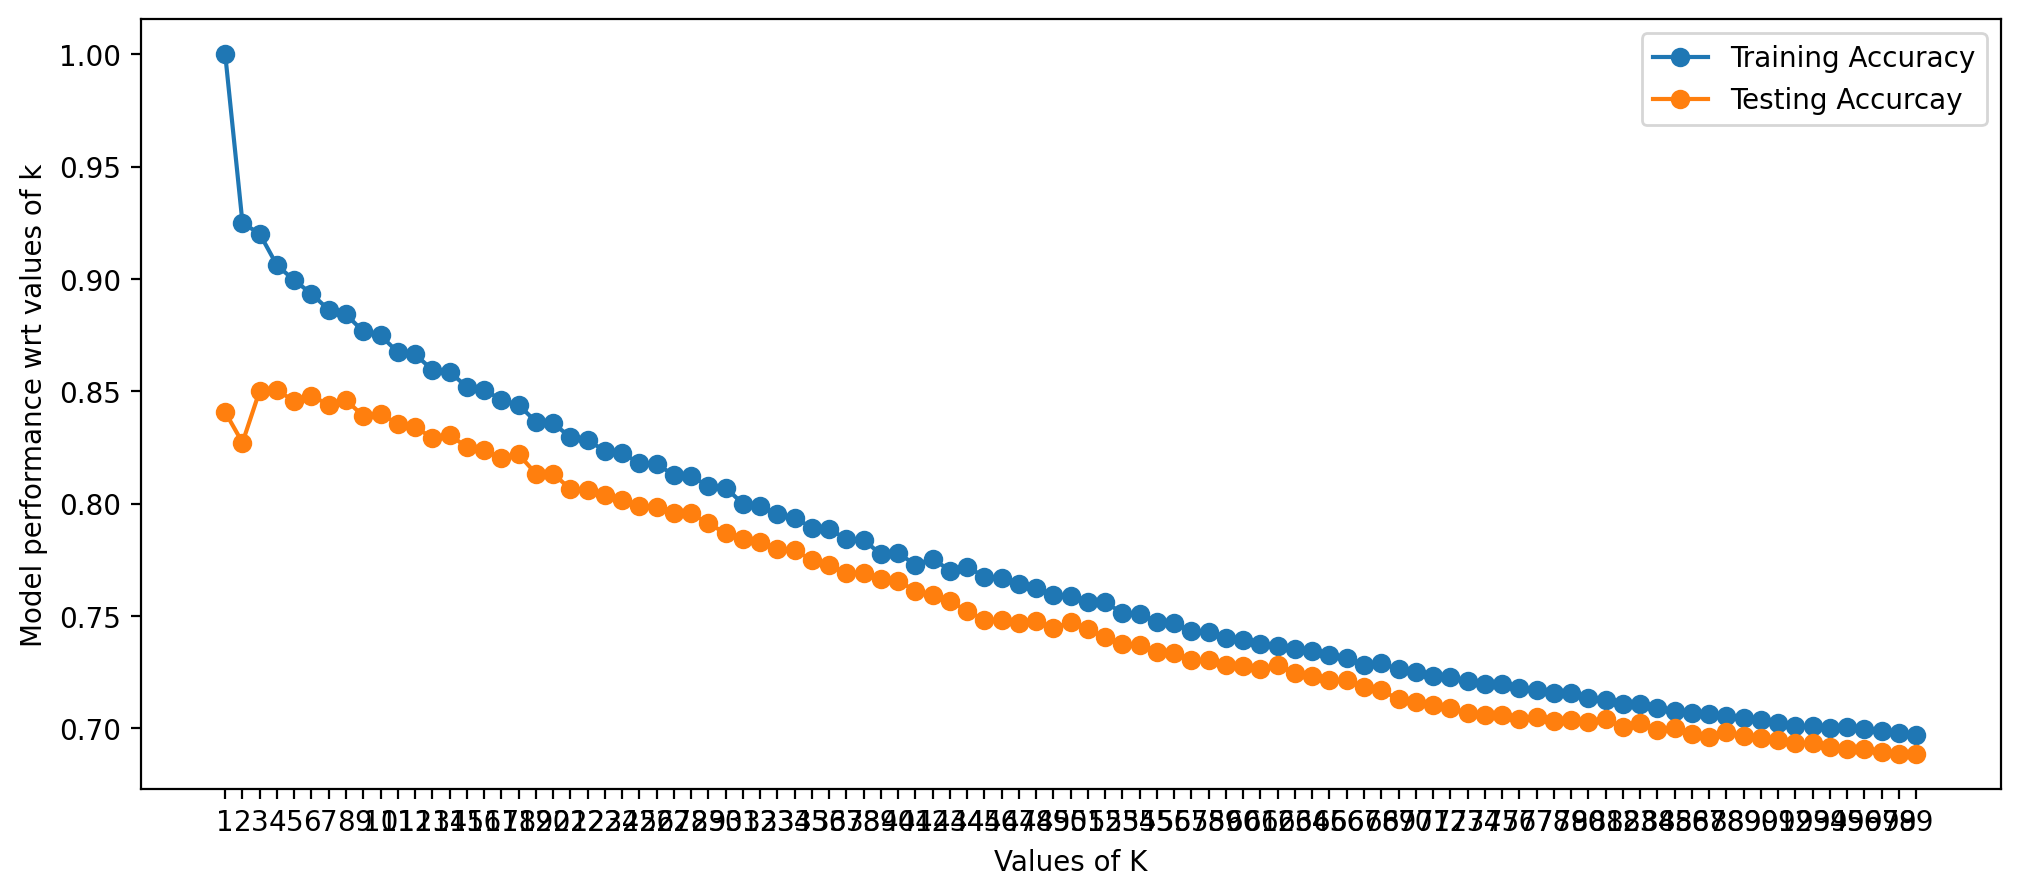

In [ ]:
x = x = list(range(1,100))

plt.figure(figsize = (12,5), dpi = 200)
plt.plot(x, acc_train, '-o', label = 'Training Accuracy')
plt.plot(x, acc_test,  '-o', label = 'Testing Accurcay')

plt.xticks(x)
plt.xlabel('Values of K')
plt.ylabel('Model performance wrt values of k')
plt.legend()

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

print('Training Set Accuracy : ', classifier.score(X_train, y_train))
print('Testing Set Accuracy  : ', classifier.score(X_test, y_test))

Training Set Accuracy :  0.9201476793248945
Testing Set Accuracy  :  0.850356879153335


#  **Decision** **Tree**

In [ ]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,0.034053,0.058574,0.044262,0.152142,1.197191,0.549812,0.033107,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,0.035500,0.077557,0.030479,0.178337,1.097356,0.411785,0.034991,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,0.038259,0.068035,0.052633,0.158190,1.209713,0.562727,0.037126,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,0.040940,0.082942,0.048548,0.177691,1.153638,0.498616,0.041389,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,0.041504,0.065313,0.032862,0.200679,1.060798,0.333680,0.040123,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [ ]:
tree_model = DecisionTreeClassifier(max_depth = 9,random_state=42)
# Fit the model on the training data
tree_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = tree_model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)


Accuracy: 90.87%
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       396
           1       1.00      1.00      1.00       161
           2       0.93      0.92      0.93       473
           3       0.91      0.90      0.90      1065
           4       0.95      0.94      0.94       553
           5       0.94      0.91      0.92       618
           6       0.83      0.87      0.85       797

    accuracy                           0.91      4063
   macro avg       0.92      0.92      0.92      4063
weighted avg       0.91      0.91      0.91      4063



In [ ]:
max_depth_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.8131922224956928
Max Depth = 4: Test Score = 0.8776765936500123
Max Depth = 5: Test Score = 0.8936746246615801
Max Depth = 6: Test Score = 0.9030273197144967
Max Depth = 7: Test Score = 0.9074575436869309
Max Depth = 8: Test Score = 0.9074575436869309
Max Depth = 9: Test Score = 0.9086881614570514
Max Depth = 10: Test Score = 0.9047501845926655
Max Depth = 11: Test Score = 0.9013044548363278
Max Depth = 12: Test Score = 0.8990893428501108
Max Depth = 13: Test Score = 0.8971203544179178
Max Depth = 14: Test Score = 0.893428501107556
Max Depth = 15: Test Score = 0.8924440068914595
Max Depth = 16: Test Score = 0.8926901304454836
Max Depth = 17: Test Score = 0.8951513659857249
Max Depth = 18: Test Score = 0.895397489539749
Max Depth = 19: Test Score = 0.8944129953236525
Best Max Depth = 9: Best Test Score = 0.9086881614570514


In [ ]:
best_dt_classifier = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
best_dt_classifier.fit(X_train, y_train)

# Make predictions on the test data using the best k
y_pred = best_dt_classifier.predict(X_test)

# Evaluate the accuracy of the classifier with the best k
accuracy_dt = accuracy_score(y_test, y_pred)
print(f"Best k: {best_max_depth}")
print(f"Accuracy with best k: {accuracy_dt * 100:.2f}%")

Best k: 9
Accuracy with best k: 90.87%


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Use the best_max_depth obtained from the code you provided
best_max_depth = 9  # Replace with the actual best max_depth

# Initialize the DecisionTreeClassifier with the best_max_depth
pruned_clf = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)

# Fit the pruned model to the training data
pruned_clf.fit(X_train, y_train)

# The decision tree is now pruned with the best_max_depth value.


DecisionTreeClassifier(max_depth=9, random_state=42)

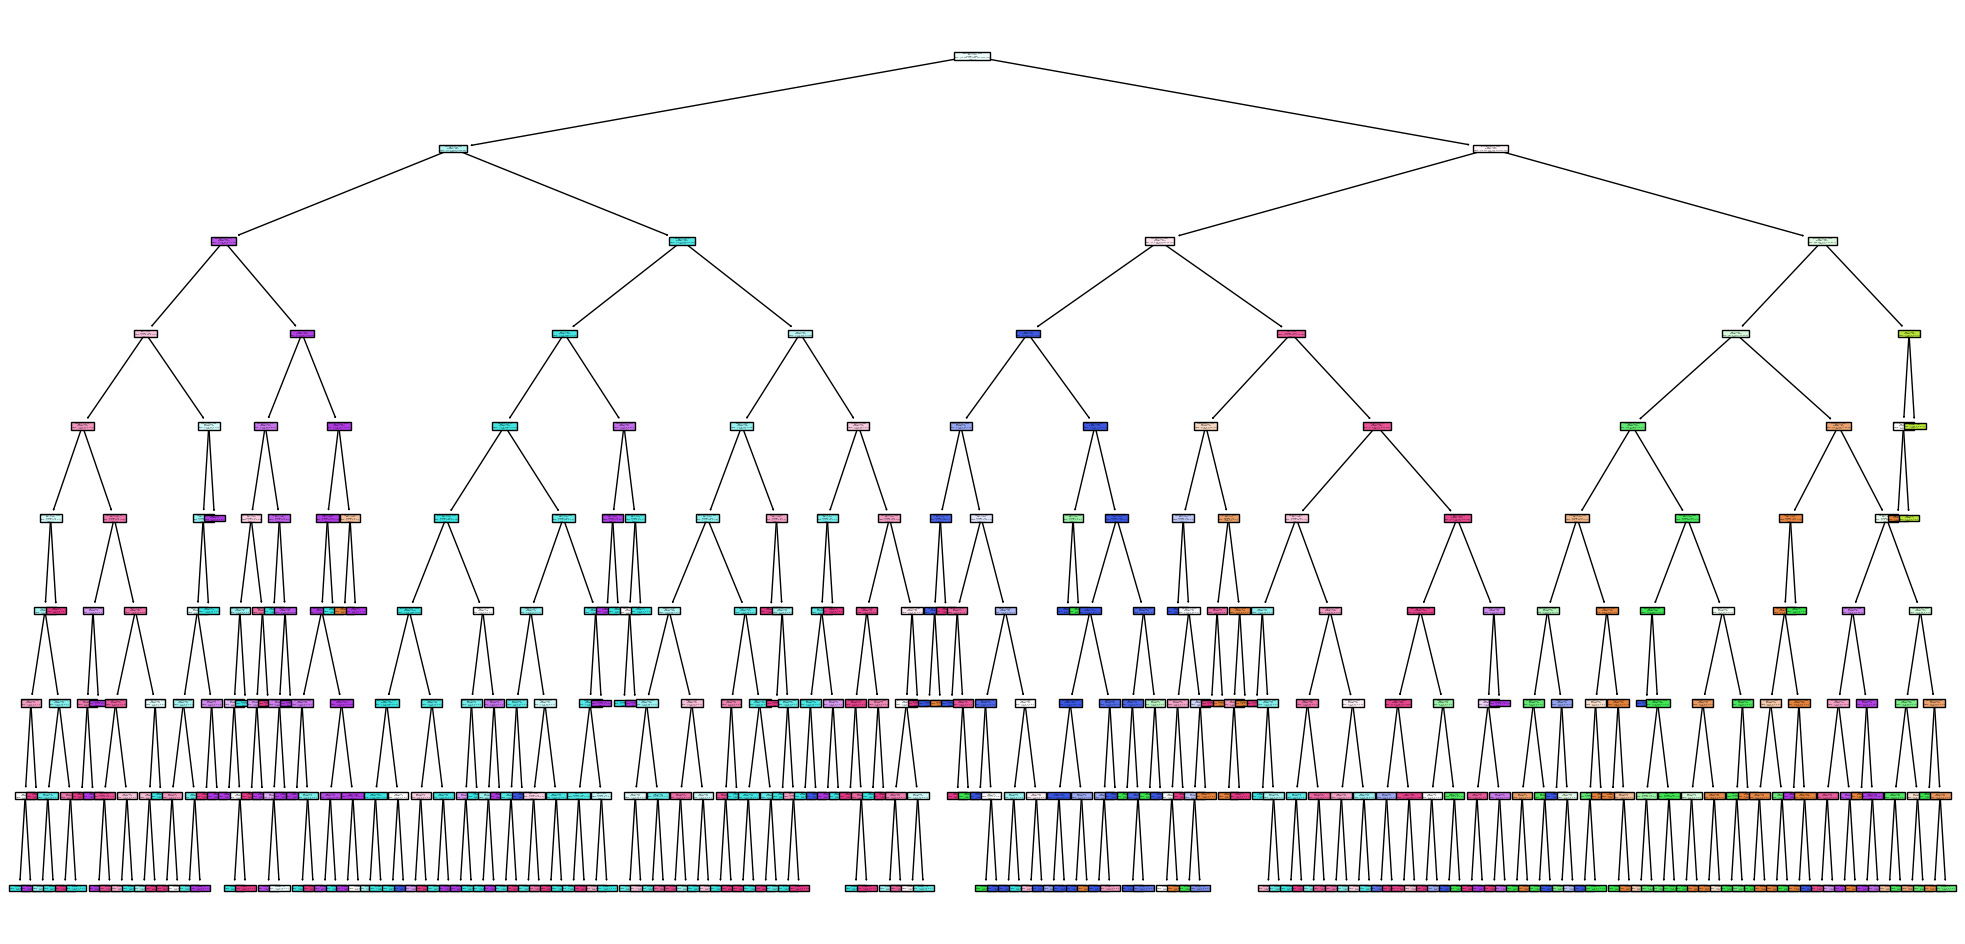

In [ ]:
from sklearn import tree
plt.figure(figsize=(25, 12))
tree.plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=[str(c) for c in clf.classes_])
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()

# Tạo một danh sách các giá trị tham số muốn thử
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Sử dụng GridSearchCV để tìm kiếm trên lưới các giá trị tham số
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# In ra các giá trị tham số tối ưu
print("Các giá trị tham số tối ưu là:")
print(grid_search.best_params_)

# In ra điểm số tốt nhất đạt được
print("Điểm số tốt nhất là:", grid_search.best_score_)


Các giá trị tham số tối ưu là:
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Điểm số tốt nhất là: 0.9079113924050632


# **RANDOM FOREST**

In [ ]:
rf_model = RandomForestClassifier(n_estimators = 100,random_state=42)
# Fit the model to the training data
rf_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred2 = rf_model.predict(X_test)
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred2)
report_rf = classification_report(y_test, y_pred2)

print(f"Accuracy: {accuracy_rf * 100:.2f}%")
print(report_rf)

Accuracy: 92.20%
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       396
           1       1.00      1.00      1.00       161
           2       0.94      0.93      0.94       473
           3       0.91      0.93      0.92      1065
           4       0.95      0.96      0.96       553
           5       0.94      0.94      0.94       618
           6       0.88      0.86      0.87       797

    accuracy                           0.92      4063
   macro avg       0.93      0.93      0.93      4063
weighted avg       0.92      0.92      0.92      4063



In [ ]:
n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # You can adjust this range

# Initialize variables to keep track of the best n_estimators and corresponding score
best_n_estimators = None
best_score_rf = 0.0

# Iterate over different n_estimators values
for n_estimators in n_estimators_values:
    # Initialize the RandomForestClassifier with the current n_estimators
    rfc = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    # Fit the model to the training data
    rfc.fit(X_train, y_train)
    # Make predictions on the testing data
    y_pred3 = rfc.predict(X_test)
    # Calculate the accuracy score
    accuracy3 = accuracy_score(y_test, y_pred3)

    # Print the score for the current n_estimators
    print(f"n_estimators = {n_estimators}: Accuracy = {accuracy3}")

    # Check if the current model has a better accuracy score than the previous best
    if accuracy3 > best_score_rf:
        best_score_rf = accuracy3
        best_n_estimators = n_estimators

# Print the best n_estimators and corresponding score
print(f"Best n_estimators = {best_n_estimators}: Best Accuracy = {best_score_rf}")

n_estimators = 10: Accuracy = 0.9173024858478956
n_estimators = 20: Accuracy = 0.9237016982525228
n_estimators = 30: Accuracy = 0.9214865862663056
n_estimators = 40: Accuracy = 0.9207482156042334
n_estimators = 50: Accuracy = 0.9202559684961851
n_estimators = 60: Accuracy = 0.9212404627122815
n_estimators = 70: Accuracy = 0.9232094511444745
n_estimators = 80: Accuracy = 0.9229633275904504
n_estimators = 90: Accuracy = 0.9229633275904504
n_estimators = 100: Accuracy = 0.9219788333743539
Best n_estimators = 20: Best Accuracy = 0.9237016982525228


In [ ]:
best_RF_classifier = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
best_RF_classifier.fit(X_train, y_train)

# Make predictions on the test data using the best k
y_pred_rf = best_RF_classifier.predict(X_test)

# Evaluate the accuracy of the classifier with the best k
accuracy_rfc = accuracy_score(y_test, y_pred_rf)
print(f"Best k: {best_n_estimators}")
print(f"Accuracy with best k: {accuracy_rfc * 100:.2f}%")

Best k: 20
Accuracy with best k: 92.37%


so sánh giữa 3 thuật toán
đặc điểm 7 đậu
loại đậu nào tốt nhất

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize and train KNN, Random Forest, and Decision Tree models with different hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=best_max_depth, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=9, random_state=42)

knn_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

# Evaluate the models
knn_predictions = knn_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
dt_predictions = dt_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("K-Nearest Neighbors (KNN) Accuracy:", knn_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)

# Determine which classifier is the best based on the metrics
best_classifier = max([
    ("K-Nearest Neighbors (KNN)", knn_accuracy),
    ("Random Forest", rf_accuracy),
    ("Decision Tree", dt_accuracy)
], key=lambda x: x[1])

print("The best classifier is:", best_classifier[0], "with an accuracy of", best_classifier[1])


K-Nearest Neighbors (KNN) Accuracy: 0.8456805316268767
Random Forest Accuracy: 0.9192714742800886
Decision Tree Accuracy: 0.9086881614570514
The best classifier is: Random Forest with an accuracy of 0.9192714742800886


Xác thực chéo của mô hình

In [ ]:
# xác thực chéo 10 lần và sau đó tính giá trị trung bình của điểm xác thực chéo
from sklearn.model_selection import cross_val_score
scores_DT = cross_val_score(rf_model, X, y, cv=10)
print(scores_DT)
print('Giá trị trung bình của Cây quyết định:', scores_DT.mean())

[0.4501845  0.74317343 0.78228782 0.96085672 0.9704579  0.96307238
 0.72747415 0.71344165 0.6957164  0.35819793]
Giá trị trung bình của Cây quyết định: 0.7364862890874109


In [ ]:
from sklearn.metrics import classification_report

def evaluate_classifier(classifier, X_train, y_train, X_test, y_test):

    # Generate and print the classification report
    report = classification_report(y_test, y_pred)
    print("Classification Report for the Classifier:")
    print(report)

# Initialize your KNN, Decision Tree, and Random Forest classifiers
knn_classifier = KNeighborsClassifier(n_neighbors=3)
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluate and compare each classifier using the evaluation function
print("K-Nearest Neighbors (KNN):")
evaluate_classifier(knn_classifier, X_train, y_train, X_test, y_test)

print("Decision Tree:")
evaluate_classifier(dt_classifier, X_train, y_train, X_test, y_test)

print("Random Forest:")
evaluate_classifier(rf_classifier, X_train, y_train, X_test, y_test)


K-Nearest Neighbors (KNN):
Classification Report for the Classifier:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       396
           1       1.00      1.00      1.00       161
           2       0.93      0.92      0.93       473
           3       0.91      0.90      0.90      1065
           4       0.95      0.94      0.94       553
           5       0.94      0.91      0.92       618
           6       0.83      0.87      0.85       797

    accuracy                           0.91      4063
   macro avg       0.92      0.92      0.92      4063
weighted avg       0.91      0.91      0.91      4063

Decision Tree:
Classification Report for the Classifier:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       396
           1       1.00      1.00      1.00       161
           2       0.93      0.92      0.93       473
           3       0.91      0.90      0.90      1065
      

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Tải mô hình đã đào tạo (đã đào tạo trước đó)
model = RandomForestClassifier()  # Use RandomForestClassifier

# Đọc tập dữ liệu ban đầu
original_data = pd.read_csv("drybean.csv")  # Thay 'original_data.csv' bằng tên tập dữ liệu của bạn

# Lấy 500 dòng đầu tiên của dữ liệu ban đầu
X_original = original_data.drop('Class', axis=1)  # Xóa cột mục tiêu
X_new = X_original.iloc[:400]  # Chọn 500 dòng đầu tiên

# Đọc cột mục tiêu (nếu có) cho 500 dòng đầu tiên
y_original = original_data['Class']  # Thay 'target_column' bằng tên cột mục tiêu
y_new = y_original.iloc[:400]  # Chọn 500 dòng đầu tiên

# Đào tạo mô hình Decision Tree trên dữ liệu ban đầu
model.fit(X_original, y_original)

# Dự đoán với dữ liệu mới
predictions = model.predict(X_new)

# Kết quả dự đoán cho 200 dòng đầu tiên
print(predictions)

['SEKER' 'SEKER' 'SEKER' 'SEKER' 'SEKER' 'SEKER' 'SEKER' 'SEKER' 'SEKER'
 'SEKER' 'SEKER' 'SEKER' 'SEKER' 'SEKER' 'SEKER' 'SEKER' 'BARBUNYA'
 'BARBUNYA' 'BARBUNYA' 'BARBUNYA' 'BARBUNYA' 'BARBUNYA' 'BARBUNYA'
 'BARBUNYA' 'BARBUNYA' 'BARBUNYA' 'BARBUNYA' 'BARBUNYA' 'BARBUNYA'
 'BARBUNYA' 'BARBUNYA' 'BARBUNYA' 'BARBUNYA' 'BARBUNYA' 'BARBUNYA'
 'BARBUNYA' 'BARBUNYA' 'BARBUNYA' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY'
 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY'
 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY'
 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY'
 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY'
 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY'
 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY'
 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY'
 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY' 'BOMBAY'
 'BO

In [ ]:
from sklearn.metrics import accuracy_score
# Đánh giá độ chính xác mô hình Random Forest dựa trên tập test trên
accuracy = accuracy_score(y_new, predictions)
print(f"Accuracy on Test Set: {accuracy * 100:.2f}%")

Accuracy on Test Set: 100.00%
